# Найди курильщиков по клиническим показаниям
## Leopard challenge Classification

## Загрузка данных
Данные беру из leopard-challenge-classification.zip
https://drive.google.com/file/d/1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7/view?usp=sharing

# Colab

In [1]:
! gdown --id 1OYjGYeYQzKI3mE02ymtkrbRJb5EurpL7

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-classification.zip -d /content/leopard-challenge-classification/

In [9]:
! unzip / content / leopard-challenge-classification.zip -d / content / leopard_challenge_classification /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
df = pd.read_csv('/content/leopard_challenge_classification/train.csv')

NameError: name 'pd' is not defined

In [1]:
df.head()

NameError: name 'train' is not defined

In [ ]:
df_test = pd.read_csv('/content/leopard_challenge_classification/test.csv')

In [ ]:
df_test.head()

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

!pip install shap

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-classification.zip', 'r') as zf:
    zf.extractall()

# 1. Problem statement

Дан набор данных с основными клиническими показателями людей.
Каждая строчка в датасете - клинические показатели одного человека - рост, вес, зрение и т.д.
**Задача:** Определить, курит человек или нет, на основании его показателей.

# 2. Importing libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
import shap
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, log_loss, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from catboost import CatBoostClassifier, Pool, cv
import joblib
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings("ignore")
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
# plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

C:\Users\Zetis\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
C:\Users\Zetis\AppData\Local\Programs\Python\Python310\lib\site-packages\shap\utils\_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.

# 3. Data upload

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [4]:
df.shape

(13863, 26)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test.head()

,ID,age,height(cm),weight(kg),waist(cm),eyesight(left),eyesight(right),hearing(left),hearing(right),systolic,relaxation,fasting blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,oral,dental caries,tartar
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,Y,0,Y
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,Y,0,N
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,Y,0,Y
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,Y,0,Y
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,Y,0,N


In [7]:
df_test.shape

(5942, 25)

# 4. PDA - Получение информации о Датасете

## 4.1 Подготовка таблиц

### Перевод названий колонок в строчные буквы и замена пробелов

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()
df_test.columns = df_test.columns.str.replace(' ', '_').str.replace('(', '_').str.replace(')', '_').str.lower()

In [9]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


## 4.2 Краткая информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13863 entries, 0 to 13862
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   13863 non-null  int64  
 1   age                  13863 non-null  int64  
 2   height_cm_           13863 non-null  int64  
 3   weight_kg_           13863 non-null  int64  
 4   waist_cm_            13863 non-null  float64
 5   eyesight_left_       13863 non-null  float64
 6   eyesight_right_      13863 non-null  float64
 7   hearing_left_        13863 non-null  float64
 8   hearing_right_       13863 non-null  float64
 9   systolic             13863 non-null  float64
 10  relaxation           13863 non-null  float64
 11  fasting_blood_sugar  13863 non-null  float64
 12  cholesterol          13863 non-null  float64
 13  triglyceride         13863 non-null  float64
 14  hdl                  13863 non-null  float64
 15  ldl                  13863 non-null 

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5942 entries, 0 to 5941
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5942 non-null   int64  
 1   age                  5942 non-null   int64  
 2   height_cm_           5942 non-null   int64  
 3   weight_kg_           5942 non-null   int64  
 4   waist_cm_            5942 non-null   float64
 5   eyesight_left_       5942 non-null   float64
 6   eyesight_right_      5942 non-null   float64
 7   hearing_left_        5942 non-null   float64
 8   hearing_right_       5942 non-null   float64
 9   systolic             5942 non-null   float64
 10  relaxation           5942 non-null   float64
 11  fasting_blood_sugar  5942 non-null   float64
 12  cholesterol          5942 non-null   float64
 13  triglyceride         5942 non-null   float64
 14  hdl                  5942 non-null   float64
 15  ldl                  5942 non-null   f

## 4.3 Пропущенные значения

In [12]:
df.isna().mean().sort_values(ascending=False)

id                     0.0
age                    0.0
tartar                 0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
triglyceride           0.0
cholesterol            0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
smoking                0.0
dtype: float64

In [13]:
df_test.isna().mean().sort_values(ascending=False)

id                     0.0
triglyceride           0.0
dental_caries          0.0
oral                   0.0
gtp                    0.0
alt                    0.0
ast                    0.0
serum_creatinine       0.0
urine_protein          0.0
hemoglobin             0.0
ldl                    0.0
hdl                    0.0
cholesterol            0.0
age                    0.0
fasting_blood_sugar    0.0
relaxation             0.0
systolic               0.0
hearing_right_         0.0
hearing_left_          0.0
eyesight_right_        0.0
eyesight_left_         0.0
waist_cm_              0.0
weight_kg_             0.0
height_cm_             0.0
tartar                 0.0
dtype: float64

**Пропуски в данных отсутствуют!!**

## 4.4 Дубликаты

In [14]:
df.duplicated().sum()

0

In [15]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные
Описание числовых переменных

In [16]:
df.describe()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,smoking
count,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000,13863.000000
mean,9932.891654,41.743851,169.618409,71.270288,84.870627,1.057304,1.053740,1.028060,1.027411,123.430643,77.166703,99.937387,193.864387,130.917767,54.204357,114.435476,15.402200,1.093775,0.981808,27.597562,30.772921,43.442978,0.212075,0.201976
std,5715.739532,13.624383,6.493959,11.195751,8.194957,0.514618,0.514613,0.165151,0.163284,12.964684,9.459288,20.682085,35.658783,71.348298,13.168432,42.050428,1.052598,0.421272,0.240337,21.559820,36.441688,50.342097,0.408793,0.401489
min,1.000000,20.000000,145.000000,40.000000,51.000000,0.100000,0.100000,1.000000,1.000000,74.000000,40.000000,48.000000,84.000000,16.000000,4.000000,7.000000,6.300000,1.000000,0.100000,7.000000,2.000000,2.000000,0.000000,0.000000
25%,4985.500000,30.000000,165.000000,65.000000,79.200000,0.800000,0.800000,1.000000,1.000000,115.000000,70.000000,90.000000,169.000000,78.000000,45.000000,91.000000,14.800000,1.000000,0.900000,20.000000,18.000000,20.000000,0.000000,0.000000
50%,9956.000000,40.000000,170.000000,70.000000,84.400000,1.000000,1.000000,1.000000,1.000000,122.000000,78.000000,96.000000,192.000000,113.000000,53.000000,113.000000,15.400000,1.000000,1.000000,24.000000,24.000000,29.000000,0.000000,0.000000
75%,14865.500000,50.000000,175.000000,80.000000,90.000000,1.200000,1.200000,1.000000,1.000000,131.000000,83.000000,104.000000,216.000000,166.000000,61.000000,135.000000,16.100000,1.000000,1.100000,30.000000,35.000000,48.000000,0.000000,0.000000
max,19804.000000,85.000000,190.000000,130.000000,128.000000,9.900000,9.900000,2.000000,2.000000,240.000000,140.000000,475.000000,441.000000,466.000000,359.000000,1340.000000,19.600000,6.000000,10.000000,981.000000,2914.000000,999.000000,1.000000,1.000000


Изменю вид таблицы для удобства

In [17]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,13863.0,9932.891654,5715.739532,1.0,4985.5,9956.0,14865.5,19804.0
age,13863.0,41.743851,13.624383,20.0,30.0,40.0,50.0,85.0
height_cm_,13863.0,169.618409,6.493959,145.0,165.0,170.0,175.0,190.0
weight_kg_,13863.0,71.270288,11.195751,40.0,65.0,70.0,80.0,130.0
waist_cm_,13863.0,84.870627,8.194957,51.0,79.2,84.4,90.0,128.0
eyesight_left_,13863.0,1.057304,0.514618,0.1,0.8,1.0,1.2,9.9
eyesight_right_,13863.0,1.053740,0.514613,0.1,0.8,1.0,1.2,9.9
hearing_left_,13863.0,1.028060,0.165151,1.0,1.0,1.0,1.0,2.0
hearing_right_,13863.0,1.027411,0.163284,1.0,1.0,1.0,1.0,2.0
systolic,13863.0,123.430643,12.964684,74.0,115.0,122.0,131.0,240.0


#### Описание числовых переменных
Данная таблица создавалась, по мере анализа данного Датасета

| Переменная | Минимум | Максимум  | Среднее | Медиана | Выбросы относительно теста |
| --- | --- |-----------| --- | --- |----------------------------|
| **1. Возраст** | 20 | 85        | ≈41 | 40 | 0                          |
| **2. Рост (см)** | 145 | 190       | ≈169.6 | 170 | 0                          |
| **3. Вес (кг)** | 40 | 130       | ≈71.2 | 70 | 0                          |
| **4. Окружность талии (см)** | 51 | 128       | ≈84.8 | 84.4 | +2                         |
| **5. Зрение (левый глаз)** | 0.1 | **9.9?**  | ≈1.05 | 1 | 0                          |
| **6. Зрение (правый глаз)** | 0.1 | **9.9?**  | ≈1.05 | 1 | 0                          |
| **7. Слух (левое ухо)** | 1 | 2         | ≈1.02 | 1 | 0                          |
| **8. Слух (правое ухо)** | 1 | 2         | ≈1.02 | 1 | 0                          |
| **9. Систолическое давление** | 74 | **240?**  | ≈123.4 | 122 | +3                         |
| **10. Диастолическое давление** | 40 | **140**?  | ≈77.1 | 78 | +2                         |
| **11. Сахар в крови** | 48 | **475?**  | ≈99.9 | 96 | +2                         |
| **12. Холестерин** | 84 | 441       | ≈193.8 | 192 | +2                         |
| **13. Триглицирид** | 16 | **466?**  | ≈130.9 | 113 | +6                         |
| **14. HDL холестерин липопротеинов высокой плотности** | 4 | **359?**  | ≈54.2 | 53 | +4                         |
| **15. LDL липопротеины низкой плотности** | 7 | **1340?** | ≈114.4 | 113 | +9                         |
| **16. Гемоглобин** | 6.3 | 19.6      | ≈15.4 | 15.4 | +9                         |
| **17. Белок в моче** | 1 | **6?**    | ≈1.09 | 1 | 0                          |
| **18. Сывороточный креатинин** | 0.1 | **10?**   | ≈0.98 | 1 | +10                        |
| **19. AST Аспартатаминотрансфераза** | 7 | **981?**  | ≈27.5 | 24 | +4                         |
| **20. ALT Аланинаминотрансфераза** | 2 | **2914?** | ≈30.7 | 24 | +3                         |
| **21. Gtp Гамма‑глютамилтранспептидаза** | 2 | **999?**  | ≈43.4 | 29 | 0                          |
| **22. Кариес** | 0 | 1         | ≈0.21 | 0 | 0                          |
Вопросительным знаком **"?"** - помечены возможные выбросы
Колонка выбросы относительно теста - показывает количество выбросов, которые присутствуют в тестовой выборке, но отсутствуют в обучающей выборке.

## 4.6 Категориальные переменные
Описание категориальных переменных

In [18]:
df.describe(include='object').T

,count,unique,top,freq
oral,13863,1,Y,13863
tartar,13863,2,Y,7517


In [19]:
df.oral.value_counts()

oral
Y    13863
Name: count, dtype: int64

In [20]:
df.tartar.value_counts()

tartar
Y    7517
N    6346
Name: count, dtype: int64

#### Описание категориальных переменных
**1. Полость рта** Странная колонка, где все значения - **Y**, то есть ДА. В дальнейшем имеет смысл её удалить.
**2. Зубной камень** 7517 - **Y**, 6346 - **N**

# 5.EDA


Создаю дополнительные Датасеты для удобной работы с признаками.

In [21]:
df_copy = df.copy()
df_test_copy = df_test.copy()

## 5.1 Phi_k взаимосвязь
Использую коэффициент корреляции Phi_k, потому что он может работать с числовыми и категориальными переменными, а также он может фиксировать нелинейную зависимость.

In [22]:
phik_overview = df.phik_matrix(verbose=False)
phik_overview['smoking'].round(2).sort_values(ascending=False)

smoking                1.00
triglyceride           0.19
age                    0.18
gtp                    0.14
hemoglobin             0.11
tartar                 0.10
dental_caries          0.09
waist_cm_              0.06
serum_creatinine       0.06
hdl                    0.05
height_cm_             0.04
weight_kg_             0.04
hearing_left_          0.04
fasting_blood_sugar    0.04
urine_protein          0.03
cholesterol            0.02
ldl                    0.02
relaxation             0.02
systolic               0.02
hearing_right_         0.02
alt                    0.01
ast                    0.00
eyesight_right_        0.00
eyesight_left_         0.00
id                     0.00
Name: smoking, dtype: float64

## 5.2 Корреляция признаков
Посмотрю корреляцию различных колонок

In [23]:
corr_matrix = df.copy()
corr_matrix = corr_matrix.drop(['oral', 'tartar'], axis=1)
corr_matrix = corr_matrix.corr()
corr_matrix['smoking'].sort_values(ascending=False)

smoking                1.000000
triglyceride           0.148264
gtp                    0.133900
hemoglobin             0.082029
dental_caries          0.057663
fasting_blood_sugar    0.047777
height_cm_             0.026243
urine_protein          0.022789
ast                    0.020400
relaxation             0.018753
waist_cm_              0.015579
alt                    0.015452
weight_kg_             0.011526
id                     0.007011
cholesterol            0.006247
eyesight_right_       -0.008161
systolic              -0.010530
eyesight_left_        -0.010562
age                   -0.014082
hearing_right_        -0.018433
hearing_left_         -0.024554
ldl                   -0.035390
serum_creatinine      -0.041838
hdl                   -0.042110
Name: smoking, dtype: float64

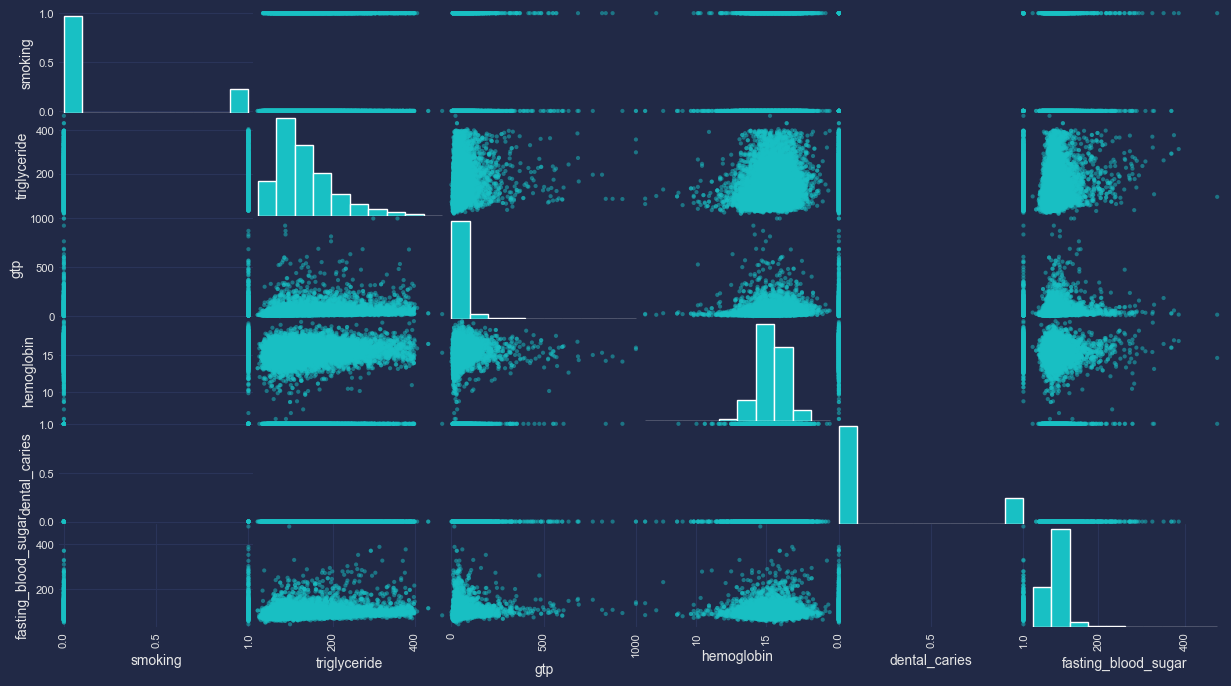

In [24]:
attributes = ['smoking', 'triglyceride', 'gtp', 'hemoglobin', 'dental_caries', 'fasting_blood_sugar']
pd.plotting.scatter_matrix(df[attributes], figsize=(15, 8))
plt.show()

Оценю зависимости на графике heatmap

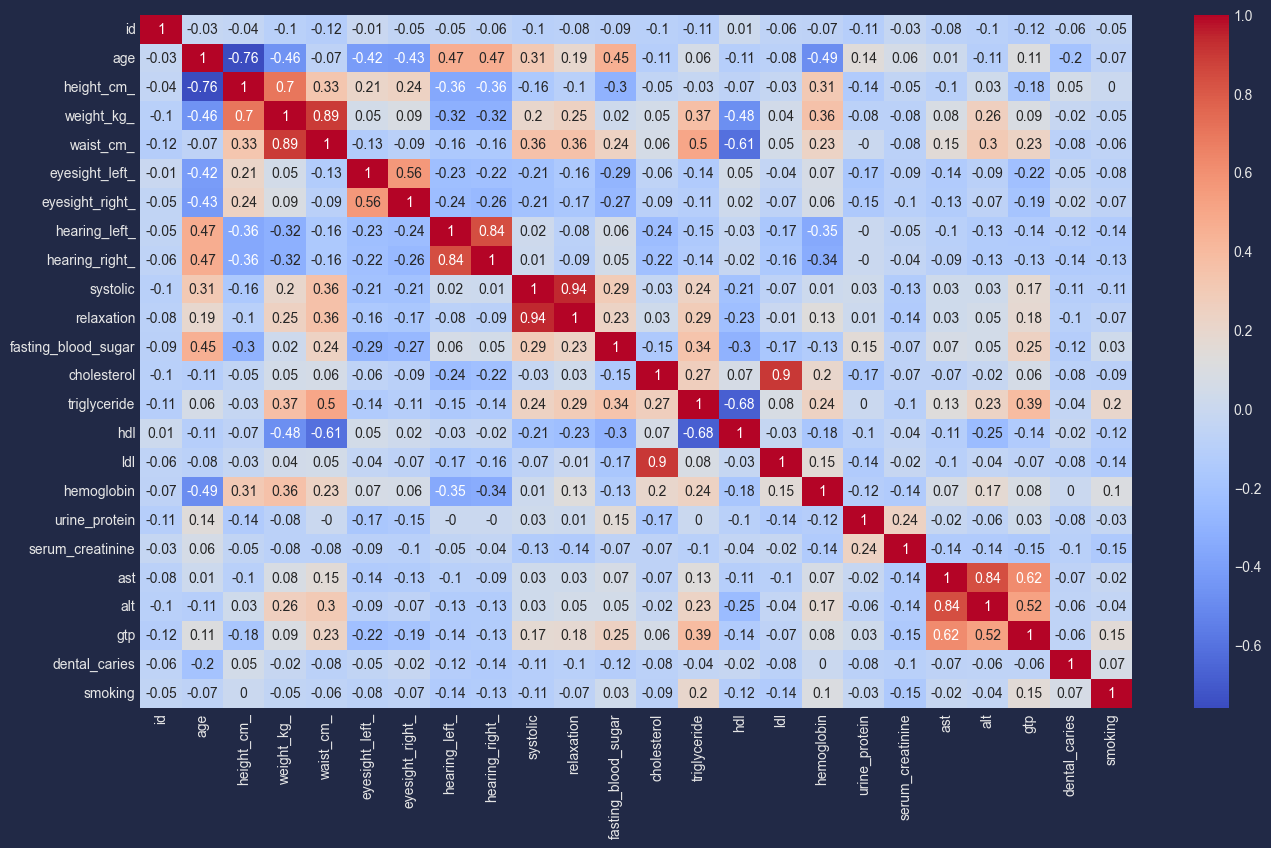

In [25]:
plt.figure(figsize=(16, 9))
sns.heatmap(round(corr_matrix.corr(), 2), annot=True, cmap='coolwarm')
plt.show()

Проверка смарт корреляцией. Помогает найти мультиколлинеарность в колонках

In [26]:
correlated = SmartCorrelatedSelection(
    variables=None,
    method='pearson',
    threshold=0.8,
    missing_values='ignore',
    selection_method='variance',
    estimator=None,
    scoring='roc_auc',
    cv=5)

correlated.fit(df)

SmartCorrelatedSelection(cv=5, selection_method='variance')

Смарт корреляция не рекомендует каких либо признаков к дропу

In [27]:
correlated.features_to_drop_

[]

## 5.3 Количественные признаки
Построю графики распределения количественных признаков

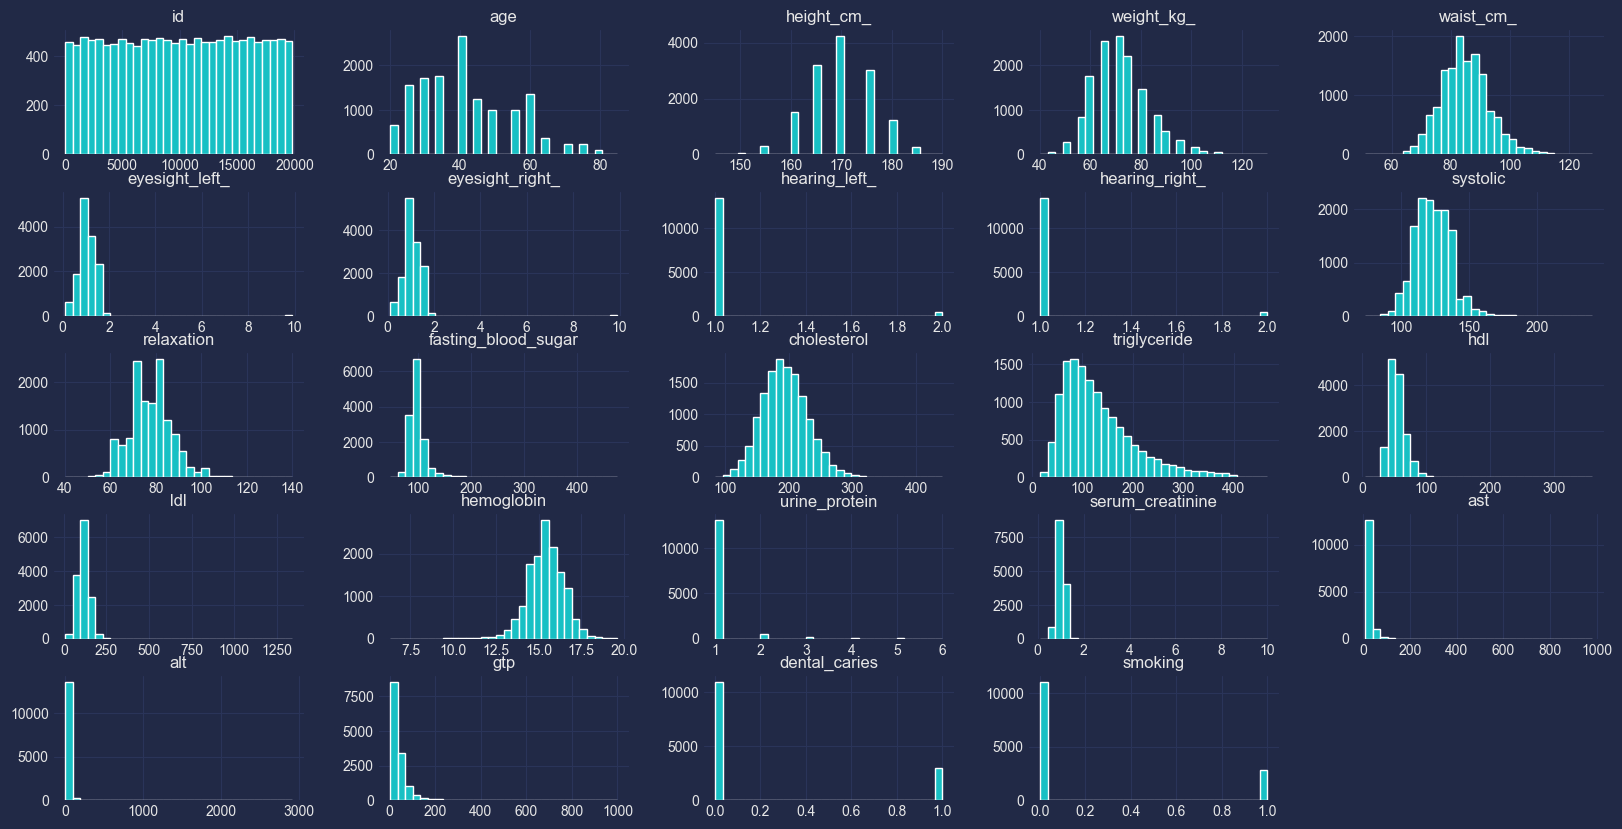

In [28]:
df.hist(figsize=(20, 10), bins=30, legend=False);
plt.show()

#### Функция гистограммы и описания для количественных признаков
Для удобства создам функцию построения гистограммы и боксплота

In [29]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1, 2, 2)
    sns.boxplot(data=ds, y=ds[x]);

### Smoking - Распределение курильшиков

Бинарный признак

In [30]:
df.smoking.value_counts()

smoking
0    11063
1     2800
Name: count, dtype: int64

In [31]:
df.smoking.sum() / df.smoking.count()

0.20197648416648634

Курильшиков ≈ 20% в обучающей выборке

### Age - возраст

count    13863.000000
mean        41.743851
std         13.624383
min         20.000000
25%         30.000000
50%         40.000000
75%         50.000000
max         85.000000
Name: age, dtype: float64


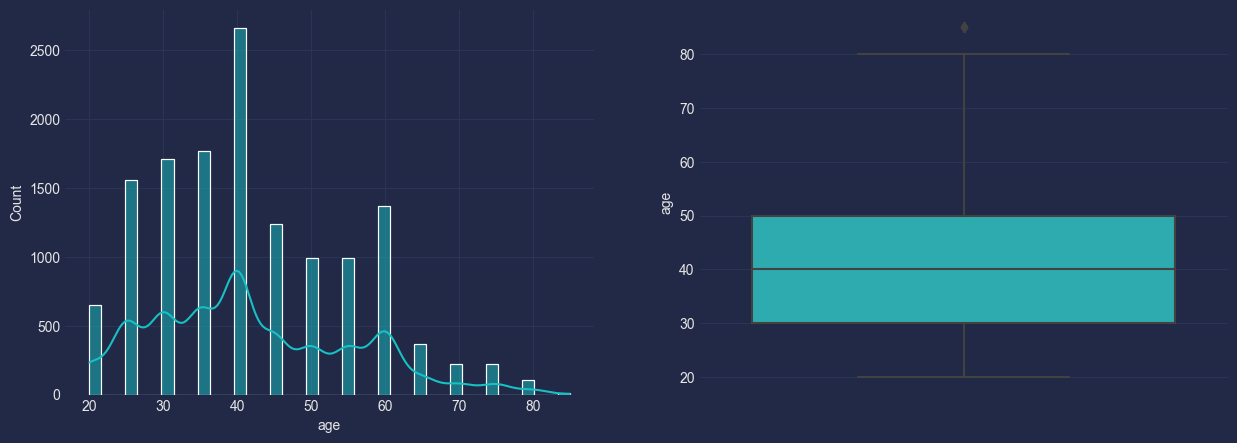

In [32]:
hist_box_describe_num(df, 'age')

Половина людей от 30 до 50 лет.
Сравню с графиком курящих людей.

In [33]:
df_copy.groupby('age').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
age,,
40,2662,0.276108
45,1235,0.273684
50,995,0.257286
55,988,0.210526
35,1765,0.171671
20,654,0.171254
60,1369,0.168736
25,1558,0.165597
30,1711,0.163647


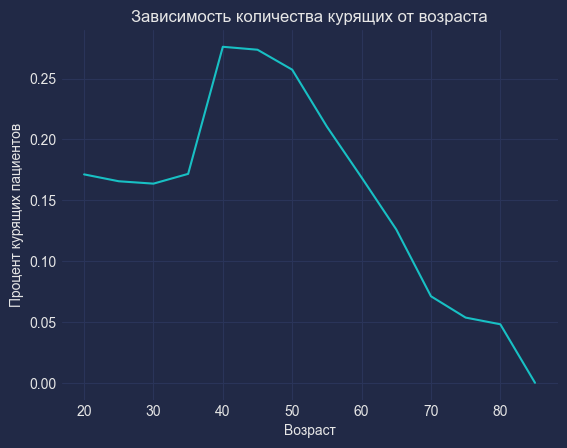

In [34]:
df_copy.groupby('age').smoking.mean().plot()
plt.title('Зависимость количества курящих от возраста')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Возраст');

**ЕСТЬ зависимость курения от возраста**
Больше всего людей курят в возрасте от 35 до 55 лет.

### Height - рост

count    13863.000000
mean       169.618409
std          6.493959
min        145.000000
25%        165.000000
50%        170.000000
75%        175.000000
max        190.000000
Name: height_cm_, dtype: float64


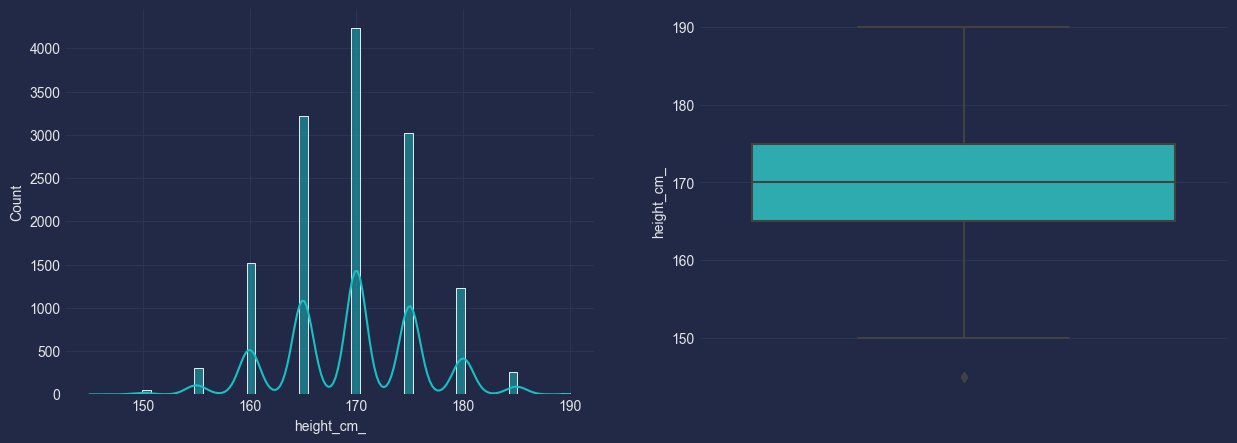

In [35]:
hist_box_describe_num(df, 'height_cm_')

Половина пациентов имеют рост от 165 до 175

In [36]:
df_copy.groupby('height_cm_').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
height_cm_,,
175,3021,0.222112
170,4238,0.211656
185,265,0.203774
180,1230,0.193496
165,3213,0.187986
150,48,0.187500
160,1521,0.184747
155,311,0.144695
190,14,0.071429


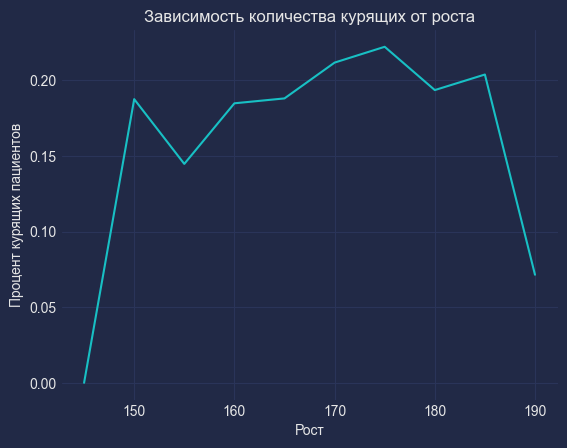

In [37]:
df_copy.groupby('height_cm_').smoking.mean().plot()
plt.title('Зависимость количества курящих от роста')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Рост');

**НЕТ прямой зависимости курения с ростом**

In [38]:
df.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


### Weight - Вес

count    13863.000000
mean        71.270288
std         11.195751
min         40.000000
25%         65.000000
50%         70.000000
75%         80.000000
max        130.000000
Name: weight_kg_, dtype: float64


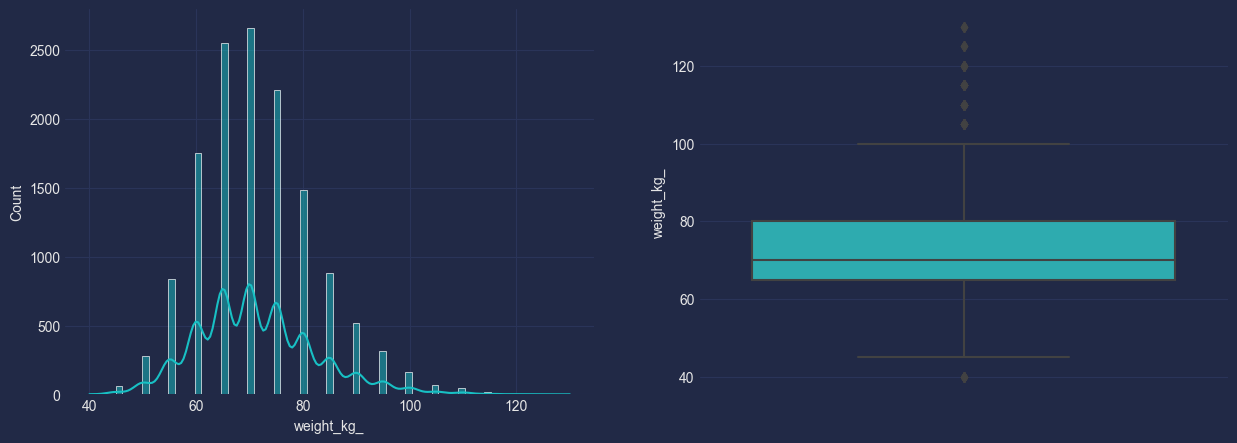

In [39]:
hist_box_describe_num(df, 'weight_kg_')

Половина пациентов имеют вес от 65 до 80 кг.
Для удобства сгруппирую пациентов по весу:

In [40]:
df_copy['weight_kg_group'] = pd.qcut(df_copy['weight_kg_'], 5)

In [41]:
df_copy.groupby('weight_kg_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
weight_kg_group,,
"(80.0, 130.0]",2018,0.230426
"(75.0, 80.0]",1481,0.206617
"(39.999, 60.0]",2941,0.201632
"(60.0, 70.0]",5211,0.195548
"(70.0, 75.0]",2212,0.188517


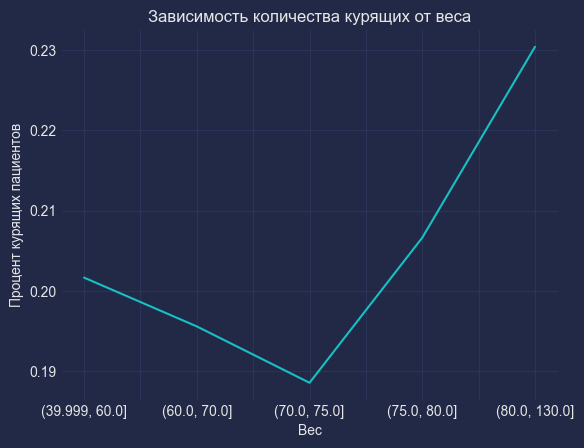

In [42]:
df_copy.groupby('weight_kg_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от веса')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Вес');

**ЕСТЬ зависимость курения с весом**
Люди с бОльшим весом чаще курят

### Waist - окружность талии

count    13863.000000
mean        84.870627
std          8.194957
min         51.000000
25%         79.200000
50%         84.400000
75%         90.000000
max        128.000000
Name: waist_cm_, dtype: float64


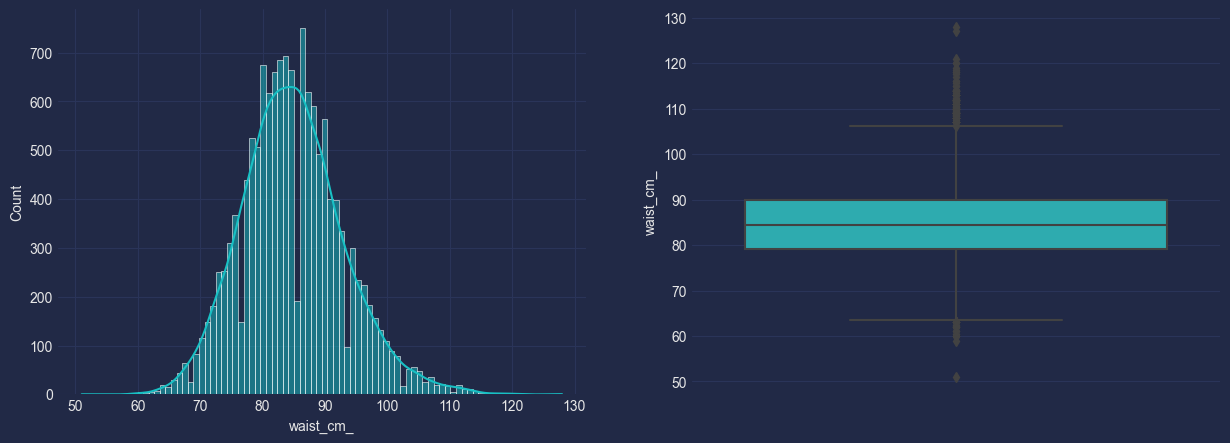

In [43]:
hist_box_describe_num(df, 'waist_cm_')

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестовой выборкой:** Всего: 2 пациента > 120
Сгруппирую людей по окружности талии:

In [44]:
df_copy['waist_cm_group'] = pd.qcut(df_copy['waist_cm_'], 5)

In [45]:
df_copy.groupby('waist_cm_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
waist_cm_group,,
"(91.0, 128.0]",2738,0.223521
"(50.999, 78.0]",2887,0.204364
"(86.2, 91.0]",2802,0.203426
"(78.0, 82.5]",2728,0.189883
"(82.5, 86.2]",2708,0.188331


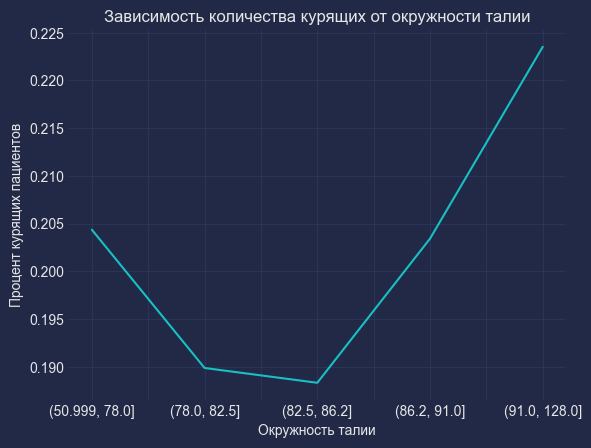

In [46]:
df_copy.groupby('waist_cm_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от окружности талии')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Окружность талии');

**Есть зависимость курения с окружностью талии**
Люди с бОльшей окружностью талии чаще курят.

### ID

Все id - уникальны, по этому в дальнейшем имеет смысл их удалить

In [47]:
df.id.count(), df.id.nunique()

(13863, 13863)

### Eyesight left - зрение левого глаза

count    13863.000000
mean         1.057304
std          0.514618
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_left_, dtype: float64


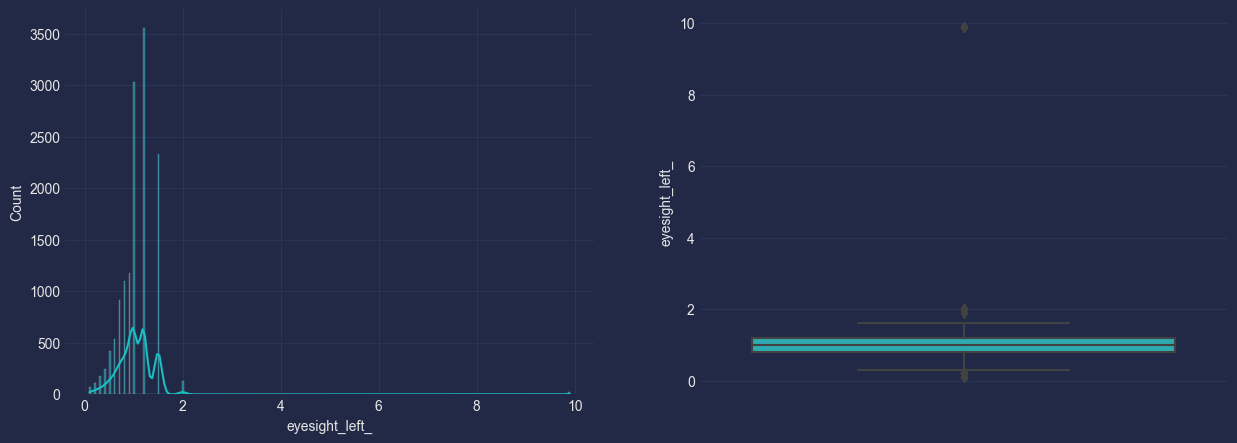

In [48]:
hist_box_describe_num(df, 'eyesight_left_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

Сгруппирую людей по зрению левого глаза:

In [49]:
df_copy['eyesight_left_group'] = pd.qcut(df_copy['eyesight_left_'], 5, duplicates='drop')

In [50]:
df_copy.groupby('eyesight_left_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
eyesight_left_group,,
"(1.0, 1.2]",3559,0.203428
"(0.099, 0.8]",3590,0.202786
"(0.8, 1.0]",4210,0.201425
"(1.2, 9.9]",2504,0.199681


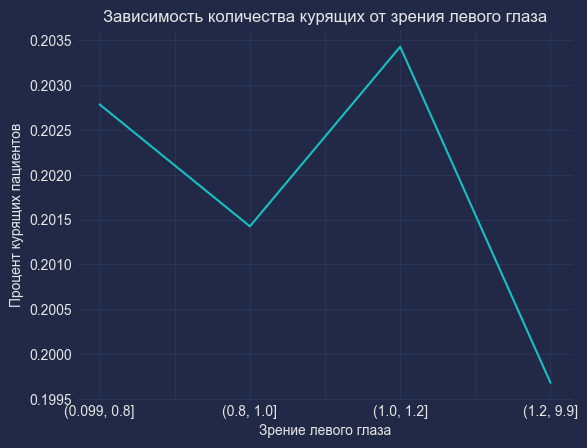

In [51]:
df_copy.groupby('eyesight_left_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от зрения левого глаза')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Зрение левого глаза');

**НЕТ прямой зависимости курения со зрением левого глаза**

### Eyesight right - зрение правого глаза

count    13863.000000
mean         1.053740
std          0.514613
min          0.100000
25%          0.800000
50%          1.000000
75%          1.200000
max          9.900000
Name: eyesight_right_, dtype: float64


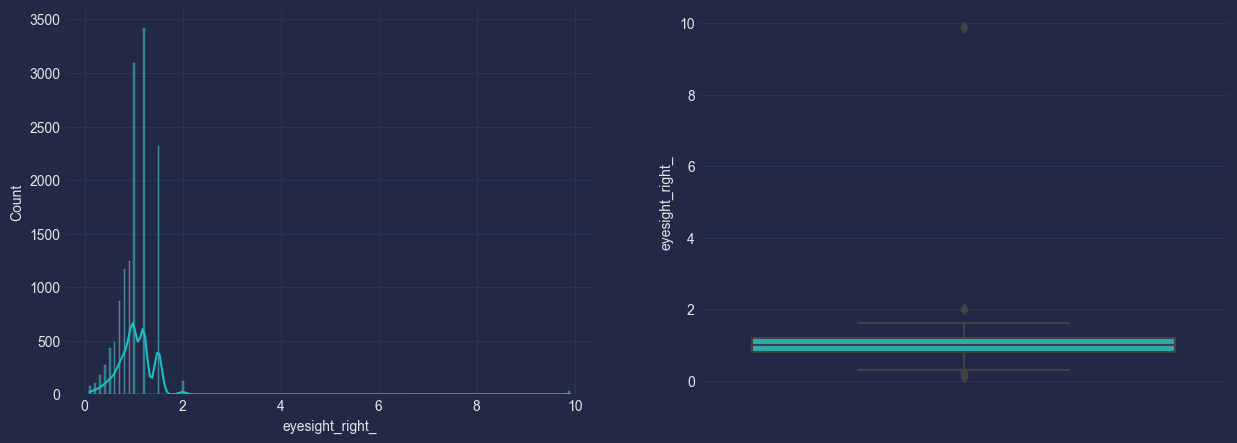

In [52]:
hist_box_describe_num(df, 'eyesight_right_')

Есть выбросы максимальных значений - 28, что составляет ≈0.2% от обучающей выборки
В тестовой выборке похожие выбросы

Сгруппирую людей по зрению левого глаза:

In [53]:
df_copy['eyesight_right_group'] = pd.qcut(df_copy['eyesight_right_'], 5, duplicates='drop')

In [54]:
df_copy.groupby('eyesight_right_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
eyesight_right_group,,
"(1.2, 9.9]",2485,0.207243
"(0.8, 1.0]",4345,0.201841
"(0.099, 0.8]",3611,0.201606
"(1.0, 1.2]",3422,0.198714


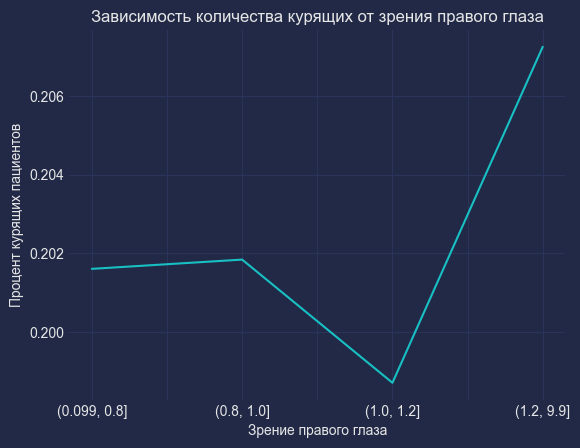

In [55]:
df_copy.groupby('eyesight_right_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от зрения правого глаза')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Зрение правого глаза');

**НЕТ прямой зависимости курения со зрением правого глаза**

### Hearing left - слышимость левого уха

Бинарный признак

In [56]:
df.hearing_left_.value_counts()

hearing_left_
1.0    13474
2.0      389
Name: count, dtype: int64

У ≈2.8% пациентов не слышит левое ухо

In [57]:
df_copy.groupby('hearing_left_').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hearing_left_,,
1.0,13474,0.203651
2.0,389,0.143959



**НЕТ прямой зависимости, так как мало данных**

### Hearing right - слышимость правого уха

Бинарный признак

In [58]:
df.hearing_right_.value_counts()

hearing_right_
1.0    13483
2.0      380
Name: count, dtype: int64

У ≈2.7% пациентов не слышит правое ухо

In [59]:
df_copy.groupby('hearing_right_').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hearing_right_,,
1.0,13483,0.203219
2.0,380,0.157895


**НЕТ прямой зависимости курения, так как мало данных**

### Systolic - систолическое давление

count    13863.000000
mean       123.430643
std         12.964684
min         74.000000
25%        115.000000
50%        122.000000
75%        131.000000
max        240.000000
Name: systolic, dtype: float64


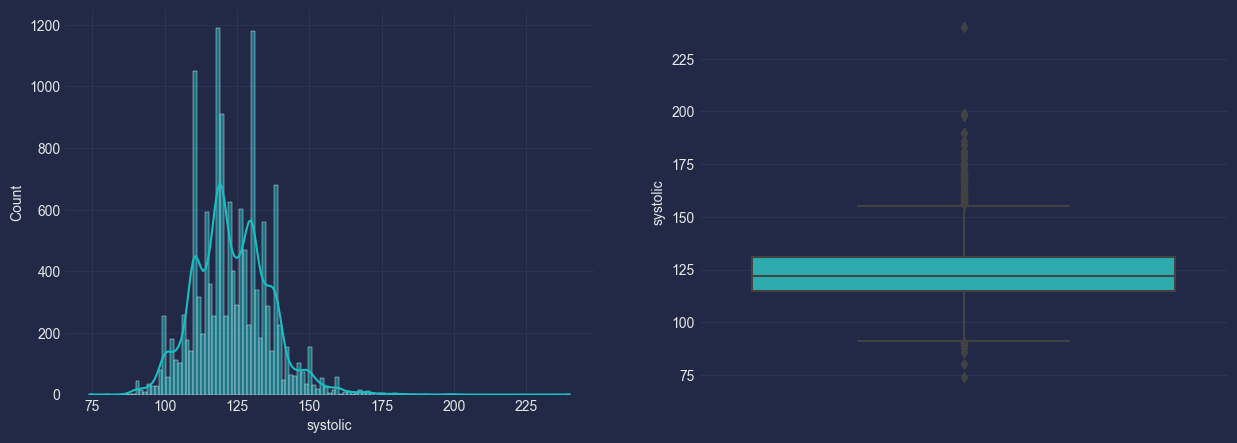

In [60]:
hist_box_describe_num(df, 'systolic')

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: - 1 пациент > 200, 2 пациента < 85

Сгруппирую людей по систолическому давлению:

In [61]:
df_copy['systolic_group'] = pd.qcut(df_copy['systolic'], 5, duplicates='drop')

In [62]:
df_copy.groupby('systolic_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
systolic_group,,
"(112.0, 120.0]",3508,0.206385
"(120.0, 126.0]",1918,0.203858
"(126.0, 134.0]",2948,0.203528
"(73.999, 112.0]",2895,0.200691
"(134.0, 240.0]",2594,0.194295


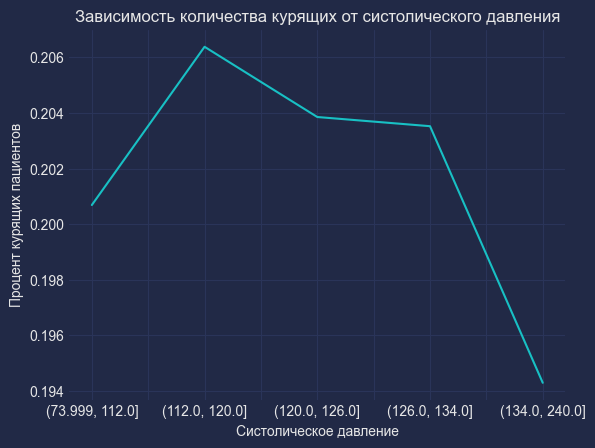

In [63]:
df_copy.groupby('systolic_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от систолического давления')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Систолическое давление');

**НЕТ прямой зависимости курения с систолическим давлением**

### Relaxation - диастолическое давление

count    13863.000000
mean        77.166703
std          9.459288
min         40.000000
25%         70.000000
50%         78.000000
75%         83.000000
max        140.000000
Name: relaxation, dtype: float64


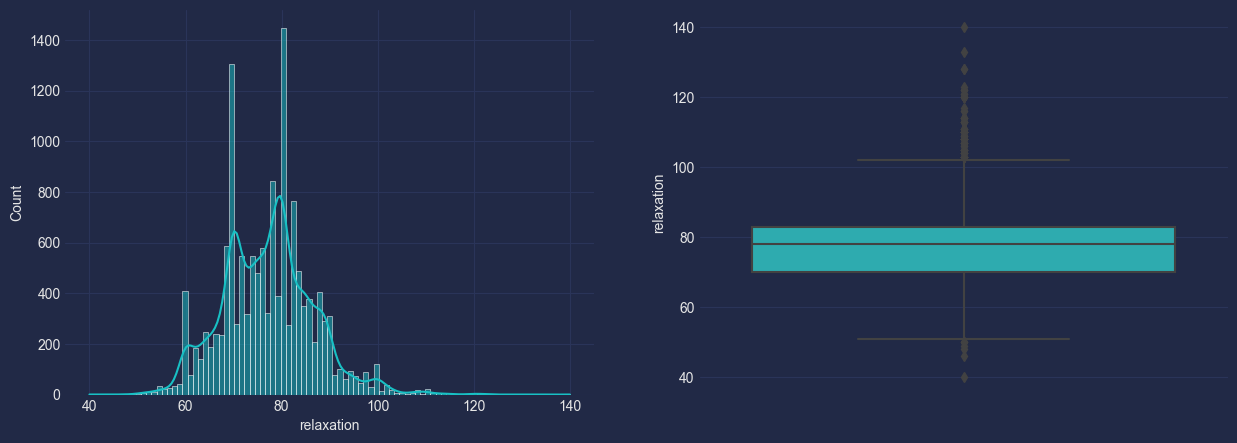

In [64]:
hist_box_describe_num(df, 'relaxation')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента: 1 пациент > 133, 1 пациент < 45

Сгруппирую людей по диастолическому давлению:

In [65]:
df_copy['relaxation_group'] = pd.qcut(df_copy['relaxation'], 5, duplicates='drop')

In [66]:
df_copy.groupby('relaxation_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
relaxation_group,,
"(80.0, 85.0]",1873,0.214095
"(75.0, 80.0]",3578,0.211850
"(85.0, 140.0]",2451,0.207262
"(70.0, 75.0]",2167,0.190586
"(39.999, 70.0]",3794,0.189773


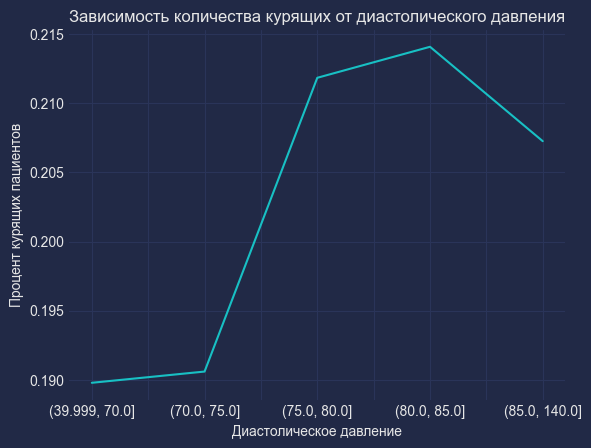

In [67]:
df_copy.groupby('relaxation_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от диастолического давления')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Диастолическое давление');

**Спорная зависимость курения с диастолическим давлением**
Люди с повышенным диастолическим давлением скорее курят чаще.


### Fasting blood sugar - Сахар в крови

count    13863.000000
mean        99.937387
std         20.682085
min         48.000000
25%         90.000000
50%         96.000000
75%        104.000000
max        475.000000
Name: fasting_blood_sugar, dtype: float64


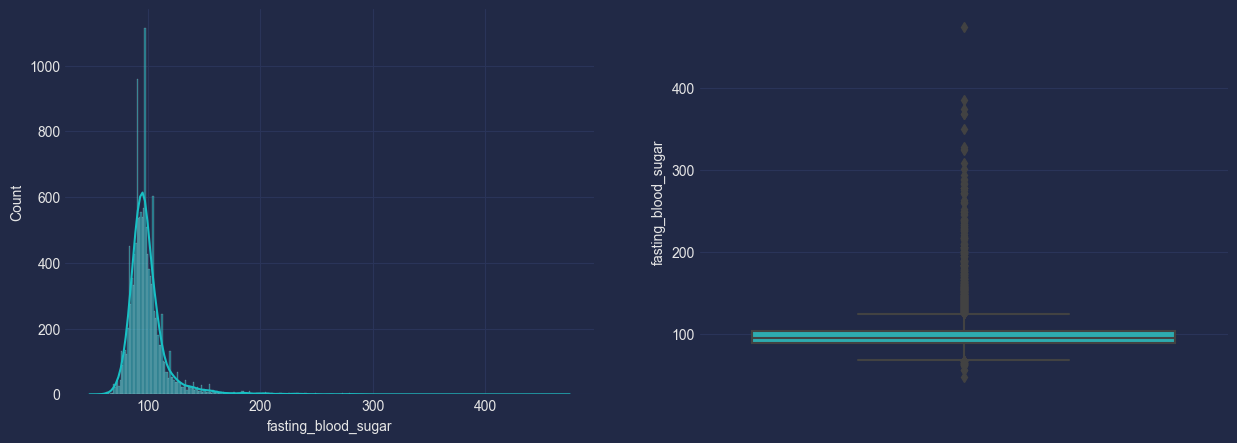

In [68]:
hist_box_describe_num(df, 'fasting_blood_sugar')

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестовой выборкой:** Всего 2 пациента: 1 пациент > 450, 1 пациент < 50

Сгруппирую людей по сахару в крови:

In [69]:
df_copy['fasting_blood_sugar_group'] = pd.qcut(df_copy['fasting_blood_sugar'], 5, duplicates='drop')

In [70]:
df_copy.groupby('fasting_blood_sugar_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
fasting_blood_sugar_group,,
"(107.0, 475.0]",2595,0.232755
"(99.0, 107.0]",2595,0.214258
"(94.0, 99.0]",2733,0.192828
"(47.999, 88.0]",2888,0.190789
"(88.0, 94.0]",3052,0.184142


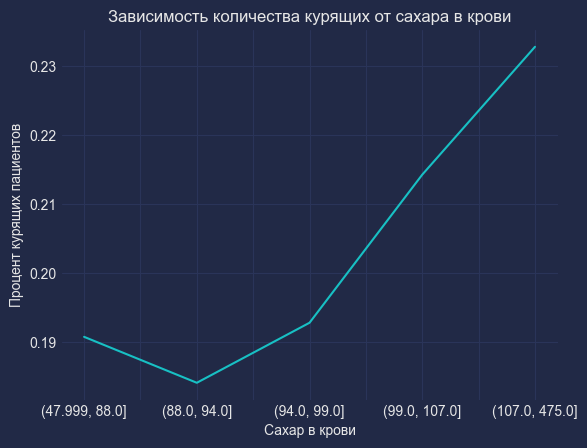

In [71]:
df_copy.groupby('fasting_blood_sugar_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от сахара в крови')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Сахар в крови');

**Есть зависимость курения с сахаром в крови**
Люди с повышенным сахаром в крови курят чаще.

### Cholesterol - холестерин

count    13863.000000
mean       193.864387
std         35.658783
min         84.000000
25%        169.000000
50%        192.000000
75%        216.000000
max        441.000000
Name: cholesterol, dtype: float64


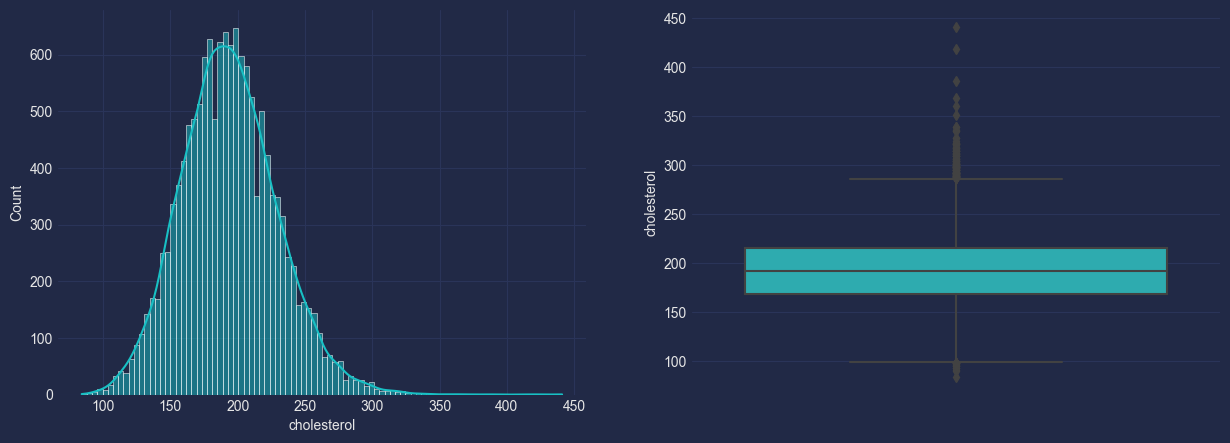

In [72]:
hist_box_describe_num(df, 'cholesterol')

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 400,

Сгруппирую людей по холестерину:

In [73]:
df_copy['cholesterol_group'] = pd.qcut(df_copy['cholesterol'], 10, duplicates='drop')

In [74]:
df_copy.groupby('cholesterol_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
cholesterol_group,,
"(211.0, 222.0]",1311,0.222731
"(192.0, 201.0]",1434,0.214086
"(149.0, 164.0]",1462,0.213406
"(222.0, 240.0]",1424,0.208567
"(240.0, 441.0]",1339,0.197909
"(175.0, 184.0]",1443,0.194733
"(83.999, 149.0]",1392,0.194684
"(201.0, 211.0]",1399,0.194425
"(164.0, 175.0]",1396,0.193410


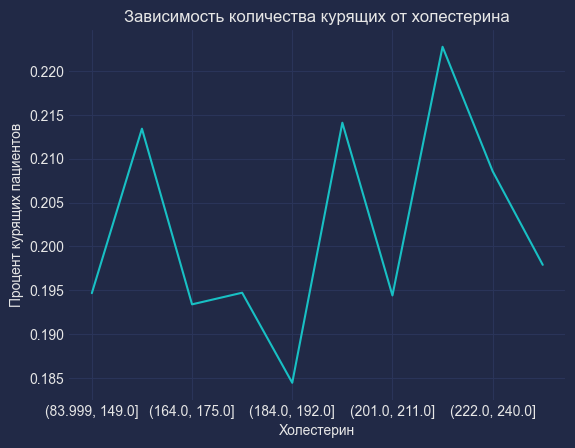

In [75]:
df_copy.groupby('cholesterol_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от холестерина')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Холестерин');

**НЕТ прямой зависимости курения с холестерином**

### Triglyceride - триглицерид

count    13863.000000
mean       130.917767
std         71.348298
min         16.000000
25%         78.000000
50%        113.000000
75%        166.000000
max        466.000000
Name: triglyceride, dtype: float64


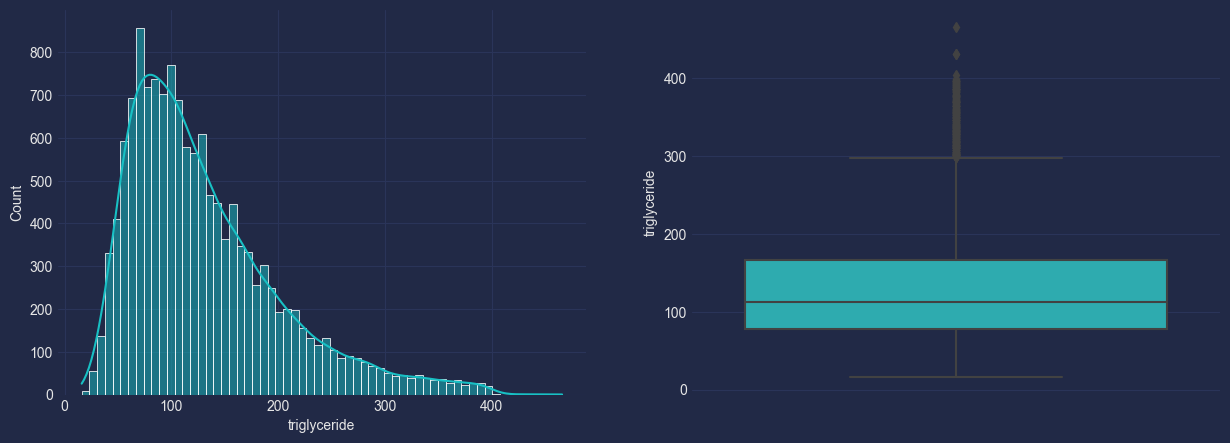

In [76]:
hist_box_describe_num(df, 'triglyceride')

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 6 пациентов < 20,

Сгруппирую людей по триглицериду:

In [77]:
df_copy['triglyceride_group'] = pd.qcut(df_copy['triglyceride'], 5, duplicates='drop')

In [78]:
df_copy.groupby('triglyceride_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
triglyceride_group,,
"(182.0, 466.0]",2747,0.296687
"(131.0, 182.0]",2751,0.226463
"(99.0, 131.0]",2745,0.206557
"(72.0, 99.0]",2755,0.165517
"(15.999, 72.0]",2865,0.118325


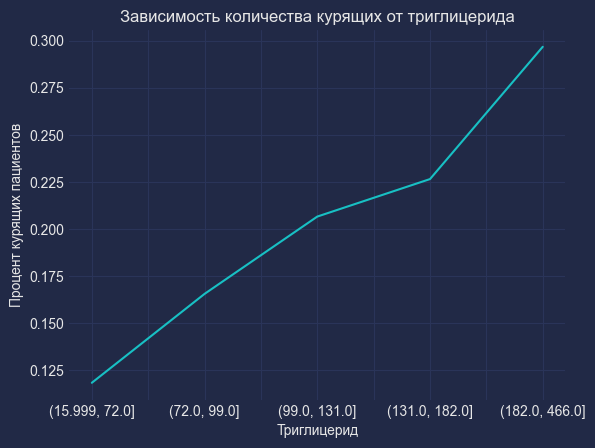

In [79]:
df_copy.groupby('triglyceride_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от триглицерида')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Триглицерид');

**ЕСТЬ прямая зависимость курения с триглицеридом**
Люди с повышенным триглициридом курят чаще

### HDL - холестерин липопротеинов высокой плотности

count    13863.000000
mean        54.204357
std         13.168432
min          4.000000
25%         45.000000
50%         53.000000
75%         61.000000
max        359.000000
Name: hdl, dtype: float64


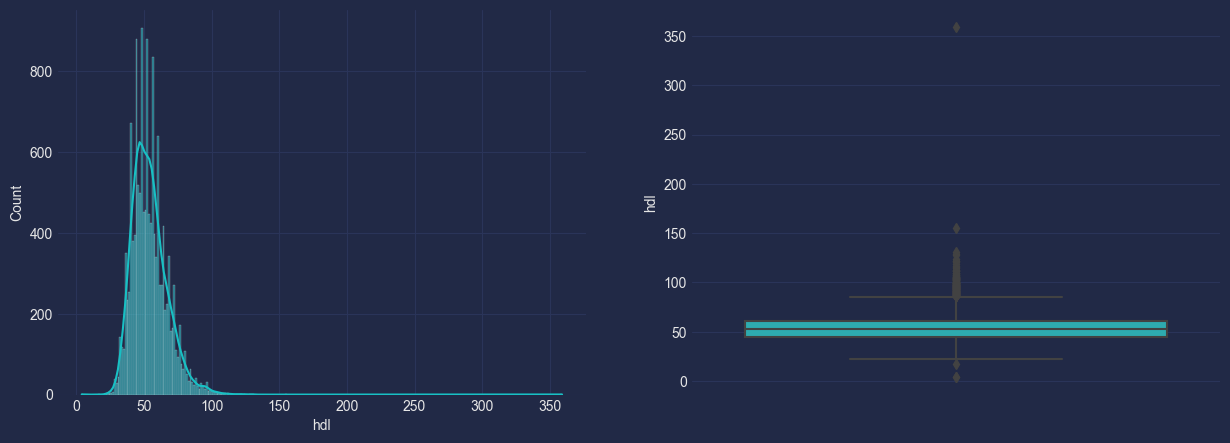

In [80]:
hist_box_describe_num(df, 'hdl')

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 1 пациент > 160, 3 пациента < 20,

Сгруппирую людей по HDL:

In [81]:
df_copy['hdl_group'] = pd.qcut(df_copy['hdl'], 5, duplicates='drop')

In [82]:
df_copy.groupby('hdl_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hdl_group,,
"(3.999, 43.0]",2795,0.236852
"(43.0, 49.0]",2801,0.218850
"(49.0, 56.0]",3106,0.189955
"(56.0, 64.0]",2504,0.187700
"(64.0, 359.0]",2657,0.175009


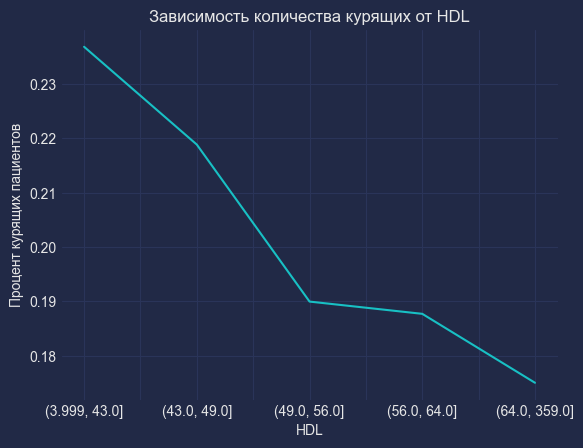

In [83]:
df_copy.groupby('hdl_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от HDL')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('HDL');

**ЕСТЬ прямая зависимость курения с HDL**
Люди с пониженным HDL курят чаще

### LDL - липопротеины низкой плотности

count    13863.000000
mean       114.435476
std         42.050428
min          7.000000
25%         91.000000
50%        113.000000
75%        135.000000
max       1340.000000
Name: ldl, dtype: float64


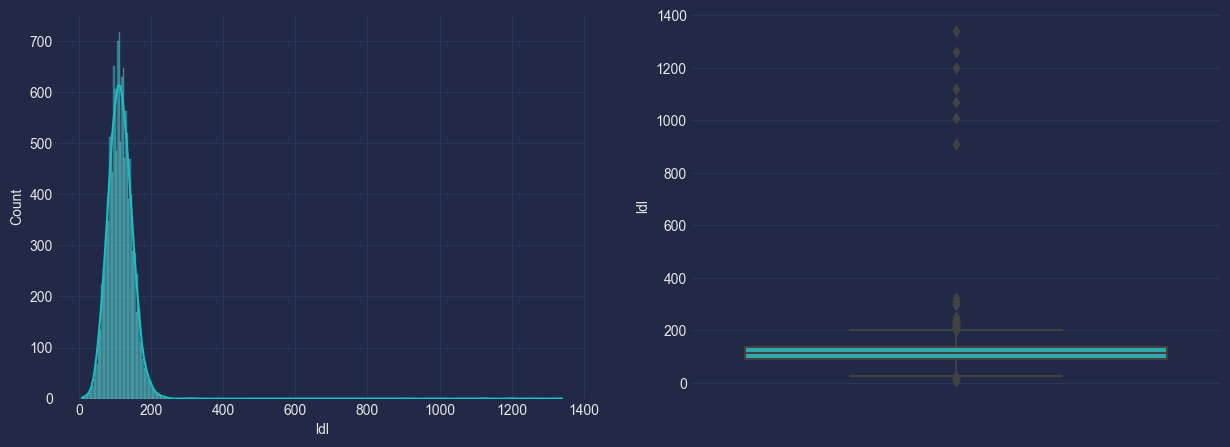

In [84]:
hist_box_describe_num(df, 'ldl')

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 6 пациентов > 1100, 3 пациента < 20,

Сгруппирую людей по LDL:

In [85]:
df_copy['ldl_group'] = pd.qcut(df_copy['ldl'], 5, duplicates='drop')

In [86]:
df_copy.groupby('ldl_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
ldl_group,,
"(6.999, 86.0]",2843,0.232853
"(86.0, 105.0]",2836,0.202045
"(105.0, 121.0]",2733,0.199049
"(121.0, 141.0]",2779,0.191796
"(141.0, 1340.0]",2672,0.182635


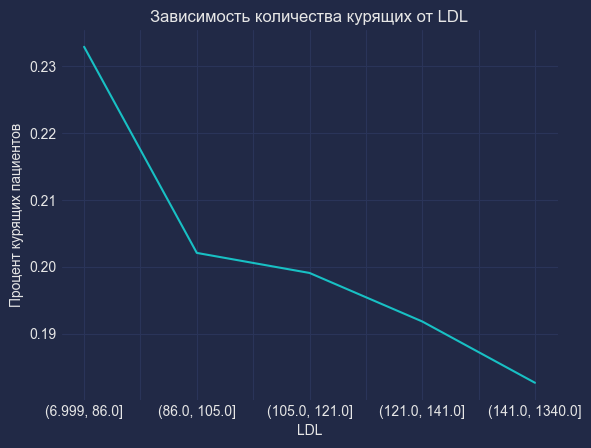

In [87]:
df_copy.groupby('ldl_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от LDL')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('LDL');

**ЕСТЬ прямая зависимость курения с LDL**
Люди с пониженным LDL курят чаще

### Hemoglobin - гемоглобин

count    13863.000000
mean        15.402200
std          1.052598
min          6.300000
25%         14.800000
50%         15.400000
75%         16.100000
max         19.600000
Name: hemoglobin, dtype: float64


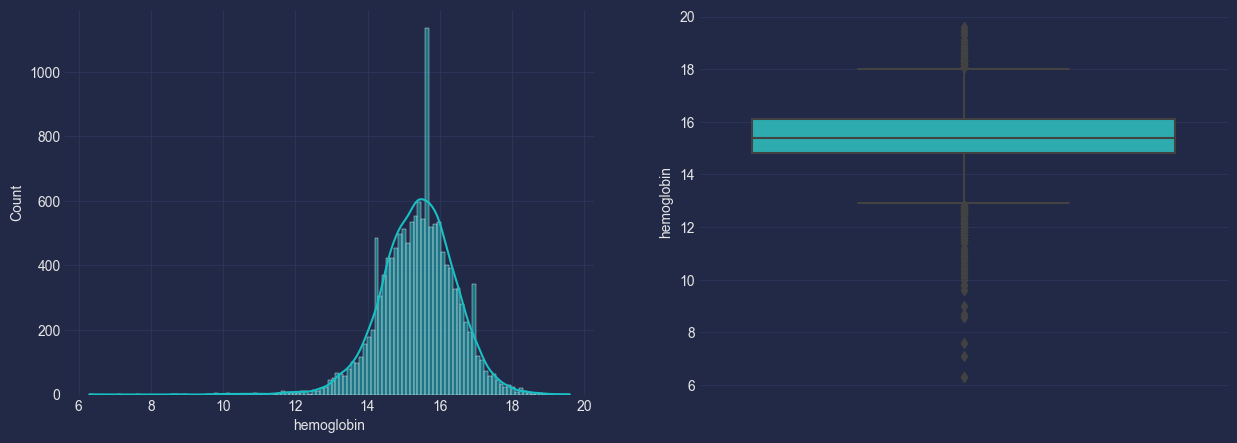

In [88]:
hist_box_describe_num(df, 'hemoglobin')

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 3 пациента > 19.4, 6 пациентов < 8.6,

Сгруппирую людей по гемоглобину:

In [89]:
df_copy['hemoglobin_group'] = pd.qcut(df_copy['hemoglobin'], 5, duplicates='drop')

In [90]:
df_copy.groupby('hemoglobin_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
hemoglobin_group,,
"(16.2, 19.6]",2734,0.260790
"(15.7, 16.2]",2425,0.213196
"(15.2, 15.7]",2830,0.196820
"(14.6, 15.2]",2895,0.175820
"(6.2989999999999995, 14.6]",2979,0.169184


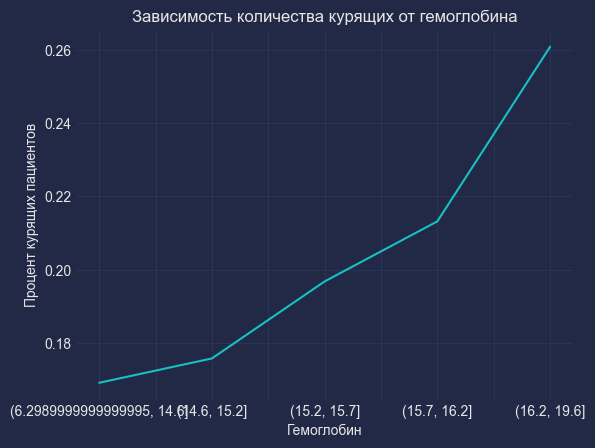

In [91]:
df_copy.groupby('hemoglobin_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от гемоглобина')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Гемоглобин');

**ЕСТЬ прямая зависимость курения с гемоглобином**
Люди с повышенным гемоглобином курят чаще

### Urine protein - белок в моче

count    13863.000000
mean         1.093775
std          0.421272
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          6.000000
Name: urine_protein, dtype: float64


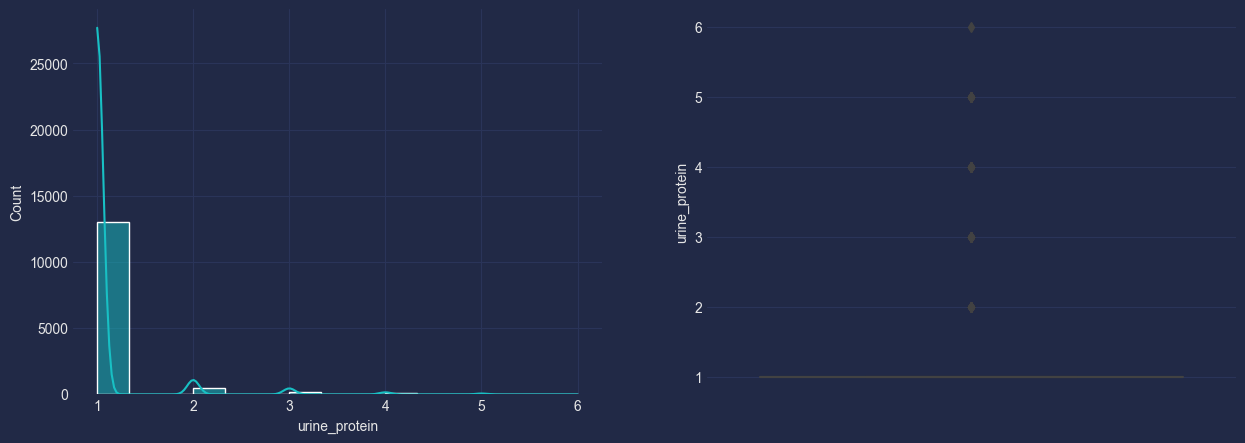

In [92]:
hist_box_describe_num(df, 'urine_protein')

In [93]:
df_copy.groupby('urine_protein').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
urine_protein,,
6.0,1,1.000000
4.0,75,0.266667
3.0,214,0.238318
2.0,514,0.235409
5.0,32,0.218750
1.0,13027,0.199585


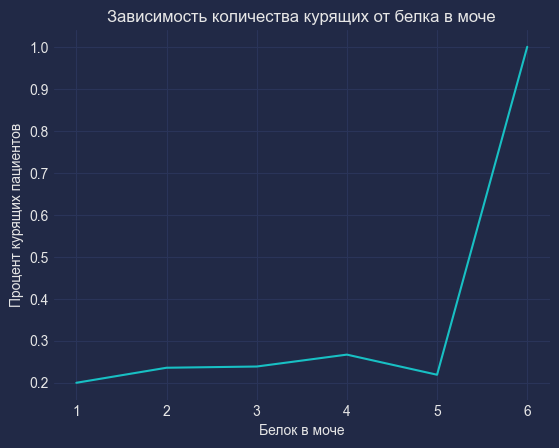

In [94]:
df_copy.groupby('urine_protein').smoking.mean().plot()
plt.title('Зависимость количества курящих от белка в моче')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Белок в моче');

**Спорная зависимость курения с белком в моче**
У абсолютного большинства людей белок в моче равен единице, в остальных случаях вероятность курения немного выше.

### Serum creatinine - Сывороточный креатинин

count    13863.000000
mean         0.981808
std          0.240337
min          0.100000
25%          0.900000
50%          1.000000
75%          1.100000
max         10.000000
Name: serum_creatinine, dtype: float64


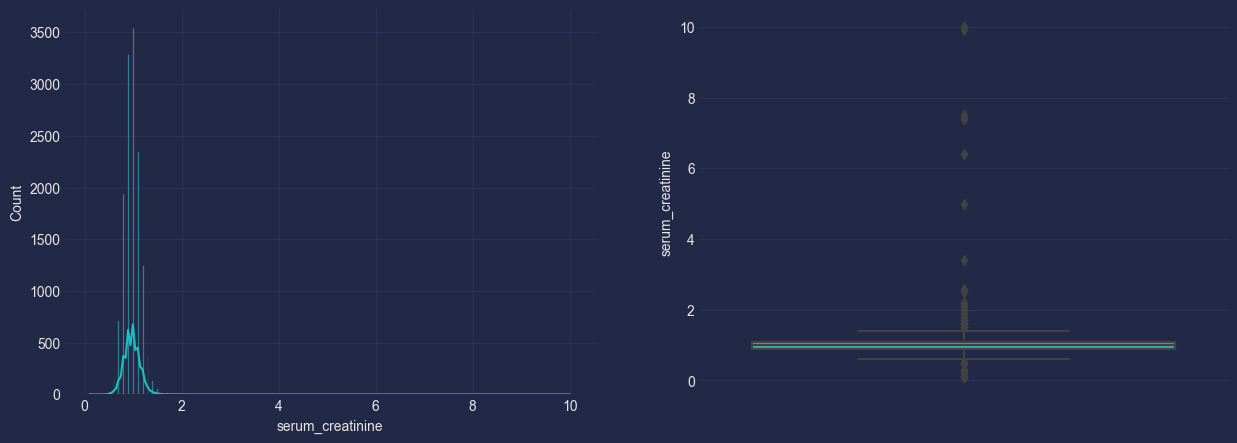

In [95]:
hist_box_describe_num(df, 'serum_creatinine')

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 10 пациентов > 2.6

Сгруппирую людей по сывороточному креатинину:

In [96]:
df_copy['serum_creatinine_group'] = pd.qcut(df_copy['serum_creatinine'], 5, duplicates='drop')

In [97]:
df_copy.groupby('serum_creatinine_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
serum_creatinine_group,,
"(0.099, 0.8]",2852,0.233170
"(0.8, 0.9]",3279,0.213480
"(0.9, 1.0]",3544,0.199492
"(1.0, 1.1]",2340,0.185043
"(1.1, 10.0]",1848,0.159632


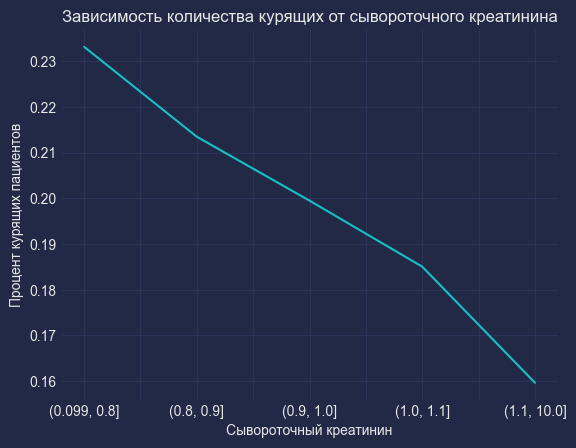

In [98]:
df_copy.groupby('serum_creatinine_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от сывороточного креатинина')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Сывороточный креатинин');

**ЕСТЬ прямая зависимость курения с сывороточным кретинином**
Люди с пониженным сывороточным кретинином курят чаще

### AST - Аспартатаминотрансфераз

count    13863.000000
mean        27.597562
std         21.559820
min          7.000000
25%         20.000000
50%         24.000000
75%         30.000000
max        981.000000
Name: ast, dtype: float64


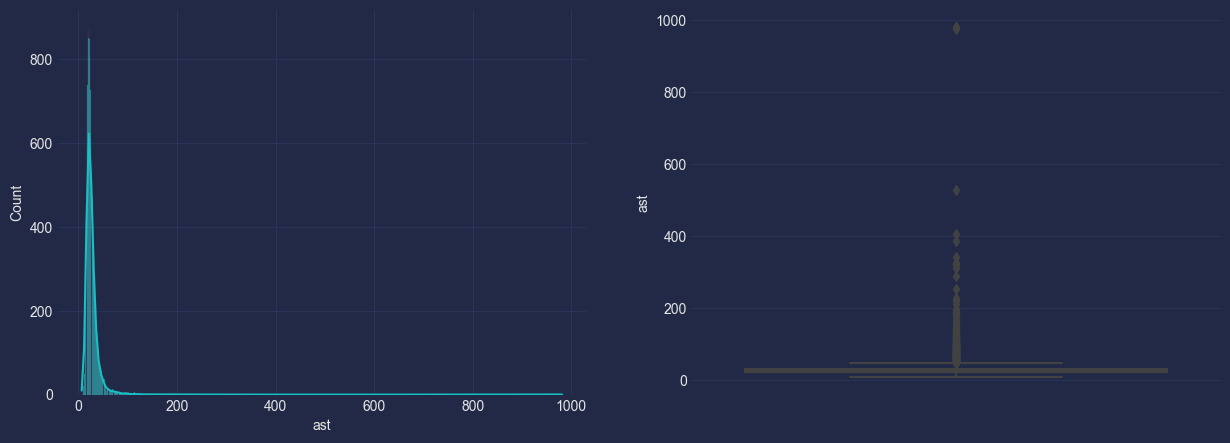

In [99]:
hist_box_describe_num(df, 'ast')

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 3 пациента > 600, 1 пациент < 9

Сгруппирую людей по AST:

In [100]:
df_copy['ast_group'] = pd.qcut(df_copy['ast'], 5, duplicates='drop')

In [101]:
df_copy.groupby('ast_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
ast_group,,
"(32.0, 981.0]",2600,0.215769
"(6.999, 19.0]",3070,0.203909
"(26.0, 32.0]",2605,0.201536
"(22.0, 26.0]",2995,0.195326
"(19.0, 22.0]",2593,0.193984


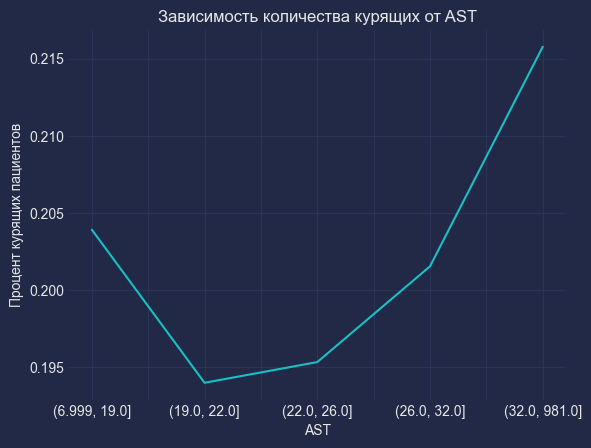

In [102]:
df_copy.groupby('ast_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от AST')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('AST');

**Спорная зависимость курения с AST**
Люди с повышенным AST скорее курят чаще

### ALT - Аланинаминотрансфераза

count    13863.000000
mean        30.772921
std         36.441688
min          2.000000
25%         18.000000
50%         24.000000
75%         35.000000
max       2914.000000
Name: alt, dtype: float64


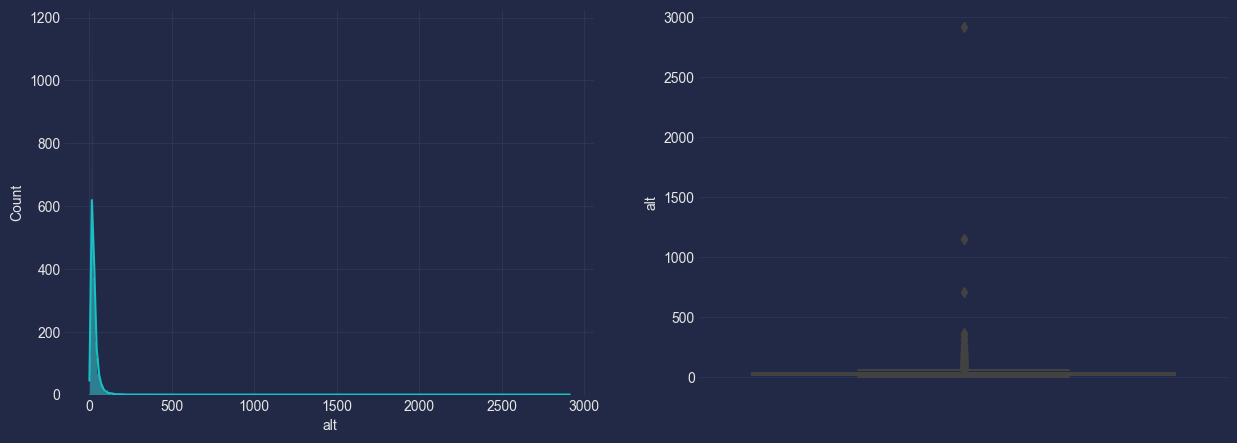

In [103]:
hist_box_describe_num(df, 'alt')

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестовой выборкой:** Всего 3 пациента: 1 пациент > 1600, 2 пациента < 4

Сгруппирую людей по ALT:

In [104]:
df_copy['alt_group'] = pd.qcut(df_copy['alt'], 5, duplicates='drop')

In [105]:
df_copy.groupby('alt_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
alt_group,,
"(39.0, 2914.0]",2677,0.221890
"(27.0, 39.0]",2832,0.207627
"(1.999, 17.0]",3380,0.200592
"(21.0, 27.0]",2645,0.200000
"(17.0, 21.0]",2329,0.176471


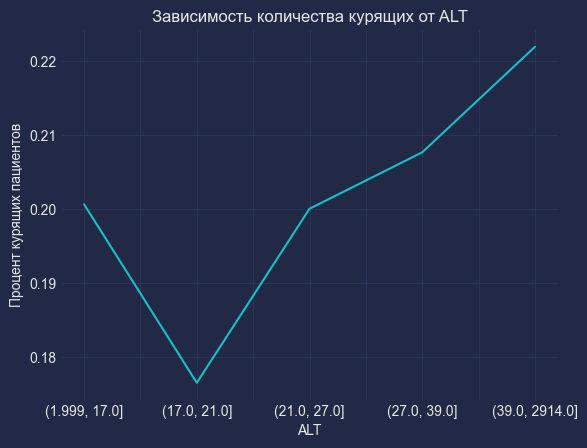

In [106]:
df_copy.groupby('alt_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от ALT')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('ALT');

**Есть зависимость курения с ALT**
Люди с повышенным ALT скорее курят чаще

### Gtp - Гамма‑глютамилтранспептидаза

count    13863.000000
mean        43.442978
std         50.342097
min          2.000000
25%         20.000000
50%         29.000000
75%         48.000000
max        999.000000
Name: gtp, dtype: float64


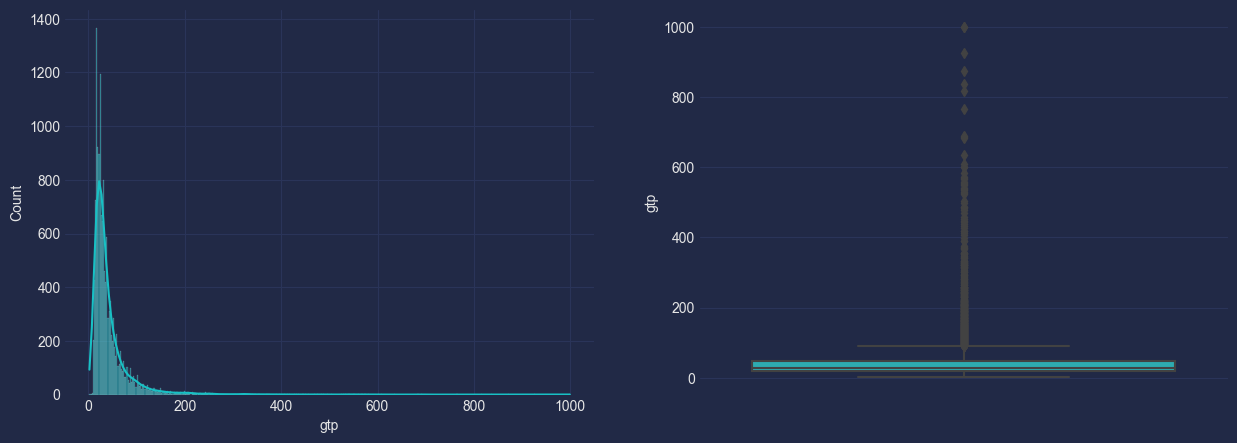

In [107]:
hist_box_describe_num(df, 'gtp')

У половины пациентов Гамма‑глютамилтранспептидаза находится в пределах от 20 до 48

Сгруппирую людей по Gtp:

In [108]:
df_copy['gtp_group'] = pd.qcut(df_copy['gtp'], 5, duplicates='drop')

In [109]:
df_copy.groupby('gtp_group').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
gtp_group,,
"(55.0, 999.0]",2708,0.322009
"(35.0, 55.0]",2615,0.235564
"(25.0, 35.0]",2797,0.189131
"(19.0, 25.0]",2544,0.146226
"(1.999, 19.0]",3199,0.128478


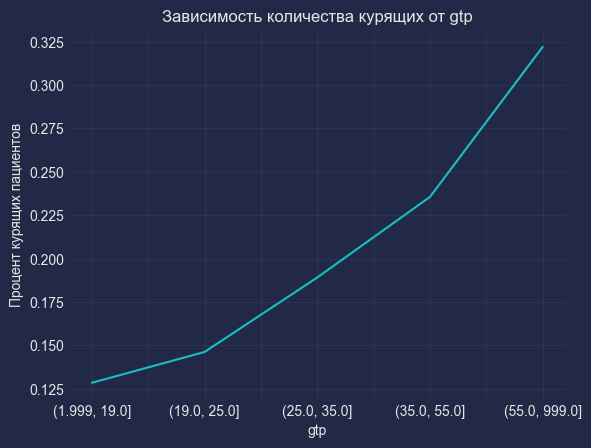

In [110]:
df_copy.groupby('gtp_group').smoking.mean().plot()
plt.title('Зависимость количества курящих от gtp')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('gtp');

**Есть прямая зависимость курения с gtp**
Люди с повышенным gtp курят чаще

### Dental caries - Кариес

Бинарный признак

In [111]:
df.dental_caries.value_counts()

dental_caries
0    10923
1     2940
Name: count, dtype: int64

In [112]:
df_copy.groupby('dental_caries').smoking.agg(['count', 'mean']).sort_values('mean', ascending=False)

,count,mean
dental_caries,,
1,2940,0.246599
0,10923,0.189966


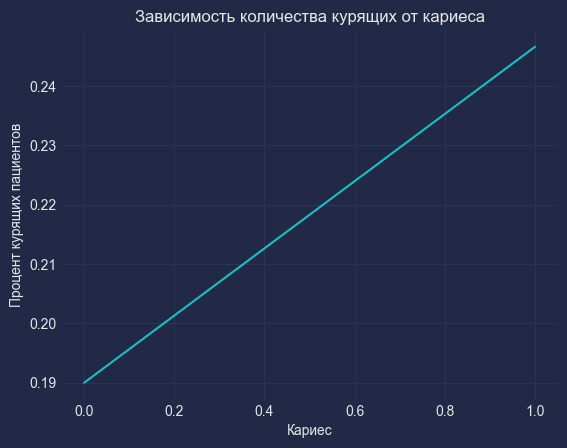

In [113]:
df_copy.groupby('dental_caries').smoking.mean().plot()
plt.title('Зависимость количества курящих от кариеса')
plt.ylabel('Процент курящих пациентов')
plt.xlabel('Кариес');

Кариес имеют ≈ 21.2% пациентов в обучающей выборке
**Есть зависимость курения с кариесом**
У курящих людей чаще встречается кариес

## 5.4 Категориальные переменные

In [115]:
df.describe(include='object')

,oral,tartar
count,13863,13863
unique,1,2
top,Y,Y
freq,13863,7517


Переменную Oral можно будет дропнуть, так как все её значения одинаковые - Y

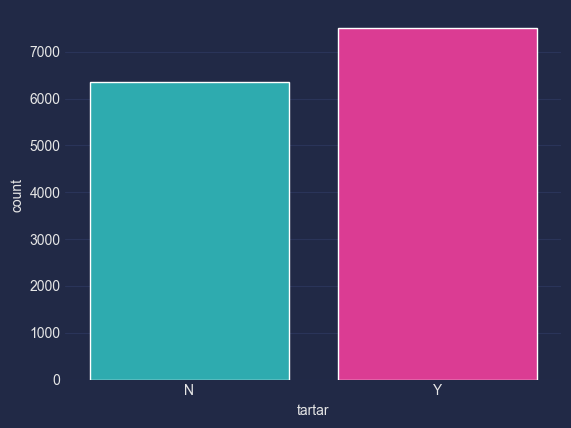

In [116]:
sns.countplot(data=df, x='tartar');

Людей, у которых есть зубной камень - больше, чем у которых нет

# 6. Preprocessing

## 6.1 Удаление выбросов

### Waist - окружность талии

У половины пациентов окружность талии составляет от 79 до 90 см
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 121

In [117]:
df = df.query('waist_cm_ < 121')

### Systolic - систолическое давление

У половины пациентов систолическое давление находится в пределах от 115 до 131
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 200, 2 пациента < 85

In [118]:
df = df.query('systolic < 200 & systolic > 85')

У половины пациентов диастолическое давление находится в пределах от 70 до 83
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента: 1 пациент > 133, 1 пациент < 45

In [119]:
df = df.query('relaxation < 135 & relaxation > 45')

### Fasting blood sugar - Сахар в крови

У половины пациентов сахар в крови находится в пределах от 90 до 104
**Выбросы в сравнении с тестовой выборкой:** Всего 2 пациента: 1 пациент > 400, 1 пациент < 50

In [120]:
df = df.query('fasting_blood_sugar < 400 & fasting_blood_sugar > 50')

### Cholesterol - холестерин

У половины пациентов холестерин находится в пределах от 169 до 216
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 2 пациента > 400,

In [121]:
df = df.query('cholesterol < 400')

### Triglyceride - триглицерид

У половины пациентов триглицерид находится в пределах от 78 до 166
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 6 пациентов < 20,

In [122]:
df = df.query('triglyceride > 20')

### HDL - холестерин липопротеинов высокой плотности

У половины пациентов холестерин липопротеинов находится в пределах от 45 до 61
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 1 пациент > 160, 3 пациента < 20,

In [123]:
df = df.query('hdl < 160 & hdl > 20')

### LDL - липопротеины низкой плотности

У половины пациентов липопротеины находится в пределах от 91 до 135
**Выбросы в сравнении с тестовой выборкой** ВСЕГО 9 пациентов: 6 пациентов > 1100, 3 пациента < 10,

In [124]:
df = df.query('ldl < 1100 & ldl > 10')

### Hemoglobin - гемоглобин

У половины пациентов гемоглобин находится в пределах от 14.8 до 16.1
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 9 пациентов: 3 пациента > 19.4, 6 пациентов < 8.6,

In [125]:
df = df.query('hemoglobin < 19.4 & hemoglobin > 8.6')

### Serum creatinine - Сывороточный креатинин

У половины пациентов сывороточный креатинин находится в пределах от 0.9 до 1.1
**Выбросы в сравнении тестовой выборкой:** ВСЕГО 10 пациентов > 2.6

In [126]:
df = df.query('serum_creatinine < 2.6')

### AST - Аспартатаминотрансфераз

У половины пациентов Аспартатаминотрансфераз находится в пределах от 20 до 30
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 4 пациента: 3 пациента > 600, 1 пациент < 8

In [127]:
df = df.query('ast < 600 & ast > 8')

### ALT - Аланинаминотрансфераза

У половины пациентов Аланинаминотрансфераза находится в пределах от 18 до 35
**Выбросы в сравнении с тестовой выборкой:** ВСЕГО 3 пациента: 1 пациент > 1600, 2 пациента < 3

In [128]:
df = df.query('alt < 1600 & alt > 3')

### Итого:
Из обучающего выборки было дропнуто 54 переменные, что составляет 0.3% от обучающей выборки.:

In [129]:
df.shape

(13809, 26)

## 6.2 Список всех фич

Составлю список всех фичей
Сразу удаляю фичу oral, т.к. она не несёт полезной информации

In [130]:
X = df.drop(['oral', 'smoking'], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test = df_test.drop('oral', axis=1)
df_test_copy = df_test_copy.drop('oral', axis=1)

In [131]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [132]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [133]:
cat_features

['tartar']

# 7. Modeling

## Baseline catboost

### Обучающая и тестовая выборки
Разделю обучающую выборку на train и test

In [137]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Составаляю список фичей
В baselin`е оставлю все фичи

In [138]:
X.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,N
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,Y
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,Y
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,Y
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,Y


In [139]:
y.head()

0    0
1    1
2    0
3    0
4    1
Name: smoking, dtype: int64

In [140]:
cat_features

['tartar']

### Создание Pool`ов для модели
Создаю Pool`ы для удобства обучения моделей

In [141]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Baseline model

### Настройка гиперпараметров
В baselin`е настрою только необходимые базовые гиперпараметры, а именно нужную метрику (F1), функцию потерь и random seed для воспроизводимости результатов. Более подробную настройку гиперпараметров можно будет увидеть в разделе Best model.

In [142]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100}

In [143]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [144]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.057358
0:	learn: 0.0000000	test: 0.0000000	best: 0.0000000 (0)	total: 151ms	remaining: 2m 30s
100:	learn: 0.1305785	test: 0.0721649	best: 0.0753425 (95)	total: 947ms	remaining: 8.43s
200:	learn: 0.2581386	test: 0.1412520	best: 0.1417069 (192)	total: 1.76s	remaining: 7s
300:	learn: 0.3652738	test: 0.1528861	best: 0.1555210 (299)	total: 2.73s	remaining: 6.34s
400:	learn: 0.4467354	test: 0.1834862	best: 0.1884498 (397)	total: 3.79s	remaining: 5.67s
500:	learn: 0.5243863	test: 0.2021116	best: 0.2021116 (500)	total: 4.69s	remaining: 4.67s
600:	learn: 0.5752296	test: 0.2130178	best: 0.2202381 (560)	total: 5.62s	remaining: 3.73s
700:	learn: 0.6254211	test: 0.2228739	best: 0.2290749 (649)	total: 6.65s	remaining: 2.84s
800:	learn: 0.6721845	test: 0.2296512	best: 0.2299854 (799)	total: 7.45s	remaining: 1.85s
900:	learn: 0.7108814	test: 0.2388489	best: 0.2439024 (882)	total: 8.37s	remaining: 919ms
999:	learn: 0.7518086	test: 0.2478386	best: 0.2536023 (981)	total: 9.25s	rema

### Feature importance
Посмотрю важность фичей в данной модели

In [145]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,8.834458
1,triglyceride,7.950693
2,waist_cm_,6.008348
3,alt,5.976088
4,age,5.889109
5,hemoglobin,5.818823
6,fasting_blood_sugar,5.496671
7,ldl,5.457218
8,hdl,5.398105
9,id,5.303189


Посмотрю основные, а так же все параметры модели

In [146]:
model.get_params()

{'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'eval_metric': 'F1',
 'cat_features': ['tartar']}

In [147]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntro

### Прогнозирование

#### Скоры

Создаю колонку для baseline catboost скора

In [148]:
df_test['baseline_cat_score'] = model.predict_proba(df_test)[:, 1]

In [149]:
df_test.baseline_cat_score.head()

0    0.255018
1    0.005462
2    0.091356
3    0.123879
4    0.146871
Name: baseline_cat_score, dtype: float64

Посмотрю распределение вероятностей (Score) курит или не курит

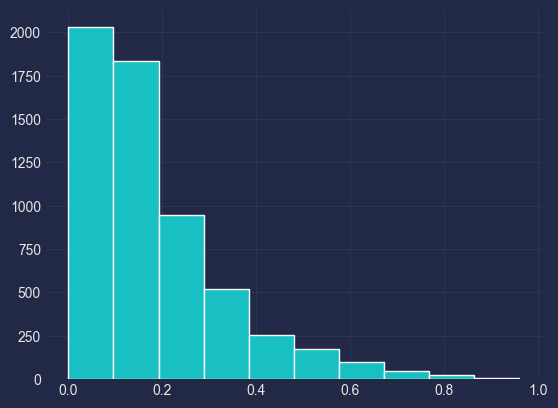

In [150]:
df_test.baseline_cat_score.hist();

#### Пороги

Посмотрю на пользователей вероятность курения которых > 0.5
Для вывода 0-ей и 1-иц нужно домножить на 1 иначе будет True и False
Процент курящих пациентов по порогу 0.5 ≈ 5.1%

In [151]:
((df_test.baseline_cat_score > 0.5) * 1).mean()

0.05116122517670818

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [152]:
model.predict(df_test).mean()

0.05116122517670818

В обучающем ДФ процент курильщиков ≈20% что существенно выше. По этому есть смысл понижать порог, но в Baselin`е оставлю порог по умолчанию

In [153]:
df.smoking.mean()

0.20204214642624374

Создаю колонку для предсказания по порогу 0.5

In [154]:
df_test['baseline_cat_pred'] = (df_test.baseline_cat_score > 0.5) * 1

In [155]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0


### Сохранение результатов

In [156]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_pred
submission.to_csv('Baseline.csv', index=False)

Проверка значений:

In [157]:
submission.smoking.mean()

0.05116122517670818

In [158]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.3117

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.2

In [159]:
((df_test.baseline_cat_score > 0.20) * 1).mean()

0.3343991921911814

#### Сохранение результатов

In [160]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_score > 0.2) * 1
submission.to_csv('Baseline_threshold0.2.csv', index=False)

In [161]:
submission.smoking.mean()

0.3343991921911814

In [162]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.42861 ↑

### Итого:
Наилучший порог для Baseline ≈ 0.2, F1 = 0.42861

## Catboost CV
Построю ещё одну Baseline модель, но на этот раз с использованием Кросс-валидации

### Настройка гиперпараметров
Т.к. это Baseline модель, оставляю большинство гиперпараметров по умолчанию.

In [163]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': 1000}

### Обучение модели

In [164]:
%%time
cv_data = cv(
    params=parameters,
    pool=full_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False,
    plot=True
)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Training on fold [0/5]

bestTest = 0.2067946824
bestIteration = 996

Training on fold [1/5]

bestTest = 0.2156573117
bestIteration = 926

Training on fold [2/5]

bestTest = 0.1974110032
bestIteration = 986

Training on fold [3/5]

bestTest = 0.1765601218
bestIteration = 969

Training on fold [4/5]

bestTest = 0.1979010495
bestIteration = 977

CPU times: total: 7min 1s
Wall time: 45.7 s


### Нахождение лучшего скора и лучшей итерации
Прибавляю к лучшей итерации единицу, т.к. отсчёт итераций в CV идёт с нуля

In [165]:
best_value = np.max(cv_data['test-F1-mean'])
best_iter = np.argmax(cv_data['test-F1-mean']) + 1

In [166]:
best_iter, best_value

(997, 0.19652263782834714)

### All data fitting
Подставляю в модель наилучшие гиперпараметры и обучаю её на всех данных:

In [167]:
parameters = {'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'iterations': best_iter,
              'verbose': 100}

In [168]:
model = CatBoostClassifier(**parameters)

In [169]:
%%time
model.fit(full_data, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.031694
0:	learn: 0.0014327	total: 9.05ms	remaining: 9.01s
100:	learn: 0.0247437	total: 818ms	remaining: 7.25s
200:	learn: 0.1172137	total: 1.6s	remaining: 6.34s
300:	learn: 0.1865385	total: 2.37s	remaining: 5.49s
400:	learn: 0.2507721	total: 3.15s	remaining: 4.69s
500:	learn: 0.2968750	total: 3.96s	remaining: 3.92s
600:	learn: 0.3389035	total: 4.82s	remaining: 3.18s
700:	learn: 0.3850328	total: 5.74s	remaining: 2.42s
800:	learn: 0.4249371	total: 6.59s	remaining: 1.61s
900:	learn: 0.4599398	total: 7.42s	remaining: 790ms
996:	learn: 0.4902013	total: 8.18s	remaining: 0us
CPU times: total: 1min 5s
Wall time: 8.34 s


### Feature importance
Посмотрю важность фичей данной модели

In [170]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,gtp,9.745119
1,age,7.678255
2,triglyceride,7.617929
3,alt,6.895955
4,hemoglobin,6.064171
5,ldl,5.898067
6,waist_cm_,5.493183
7,fasting_blood_sugar,5.468548
8,hdl,5.005661
9,ast,4.770872


Посмотрю основные, а так же все параметры модели

In [171]:
model.get_params()

{'iterations': 997,
 'loss_function': 'Logloss',
 'random_seed': 659,
 'verbose': 100,
 'eval_metric': 'F1'}

In [172]:
model.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'F1',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 997,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntrop

### Прогнозирование

#### Скоры

Создаю колонку для catboost CV скора

In [173]:
df_test['baseline_cat_cv_score'] = model.predict_proba(df_test)[:, 1]

In [174]:
df_test.baseline_cat_cv_score.head()

0    0.212576
1    0.030004
2    0.203976
3    0.084975
4    0.165591
Name: baseline_cat_cv_score, dtype: float64

Посмотрю распределение скоров

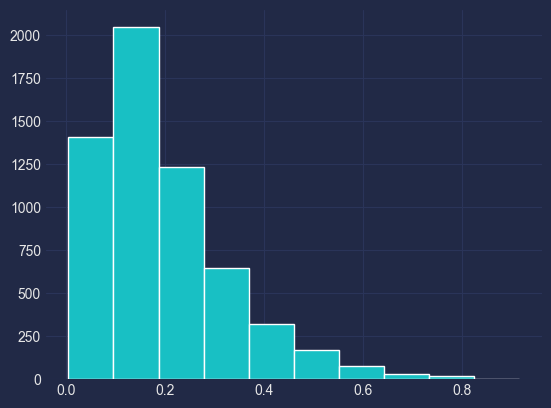

In [175]:
df_test.baseline_cat_cv_score.hist();

#### Пороги

По порогу 0.5 процент курящих людей ≈3.2% - что меньше, чем в обучающей выборке (≈20%)

In [176]:
((df_test.baseline_cat_cv_score > 0.5) * 1).mean()

0.032312352743184114

Создаю колонку для предсказания по порогу 0.5

In [177]:
df_test['baseline_cat_cv_pred'] = (df_test.baseline_cat_cv_score > 0.5) * 1

In [178]:
df_test.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar,baseline_cat_score,baseline_cat_pred,baseline_cat_cv_score,baseline_cat_cv_pred
0,19200,40,170,75,87.0,1.2,1.0,1.0,1.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,Y,0.255018,0,0.212576,0
1,7784,25,170,65,78.4,0.9,0.9,1.0,1.0,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,N,0.005462,0,0.030004,0
2,11682,50,180,105,109.3,0.9,1.0,1.0,1.0,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,Y,0.091356,0,0.203976,0
3,9949,60,160,60,81.0,0.5,0.5,1.0,1.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,Y,0.123879,0,0.084975,0
4,9378,45,175,70,83.0,0.9,1.0,1.0,1.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,N,0.146871,0,0.165591,0


### Сохранение результатов

In [179]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.baseline_cat_cv_pred
submission.to_csv('Cat_CV.csv', index=False)

Проверка значений:

In [180]:
submission.smoking.mean()

0.032312352743184114

In [181]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


**Kaggle result:** 0.23138 ↓, хуже чем Baseline

### Модификация

#### Изменяю порог до 0.2

In [182]:
((df_test.baseline_cat_cv_score > 0.2) * 1).mean()

0.3742847526085493

#### Сохранение результатов

In [183]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.baseline_cat_cv_score > 0.2) * 1
submission.to_csv('Cat_CV_GPU_THRS02_LR_auto.csv', index=False)

Проверка значений:

In [184]:
submission.smoking.mean()

0.3742847526085493

In [185]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,1
3,9949,0
4,9378,0


**Kaggle result:** F1 = 0.43165 ↑ - лучше, чем Baseline THRS 0.2

### Итого:
Наилучший порог для CV ≈ 0.2, F1 = 0.43165. Лучше, чем Baseline Threshold = 0.2, F1 = 0.42861

## Random forest

In [193]:
rf = df.copy()
rf_test = df_test_copy.copy()

### Составление списока фич
Удаляю ненужные фичи

In [194]:
rf.head()

,id,age,height_cm_,weight_kg_,waist_cm_,eyesight_left_,eyesight_right_,hearing_left_,hearing_right_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,oral,dental_caries,tartar,smoking
0,2791,65,170,75,91.0,0.6,0.9,1.0,1.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,Y,0,N,0
1,18280,35,170,85,97.0,1.5,1.5,1.0,1.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,Y,0,Y,1
2,1618,70,165,55,75.0,0.8,1.0,1.0,1.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,Y,0,Y,0
3,16856,35,180,85,83.0,1.2,1.0,1.0,1.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,Y,0,Y,0
4,5885,25,170,65,80.0,1.5,1.2,1.0,1.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,Y,0,Y,1


In [196]:
X = rf.drop(['oral', 'smoking', 'id', 'hearing_left_', 'hearing_right_', 'eyesight_left_', 'eyesight_right_', 'height_cm_'], axis=1)
X_test = rf_test.drop(['id', 'hearing_left_', 'hearing_right_', 'eyesight_left_', 'eyesight_right_', 'height_cm_'], axis=1)
y = rf.smoking

Проверяю на целостность

In [197]:
X.shape, X_test.shape

((13809, 18), (5942, 18))

### Преобразую категориальные переменные в числовые

In [198]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

Удалю переменную tartar_N, так как она дублирует информацию tartar_Y

In [200]:
X = X.drop('tartar_N', axis=1)
X_test = X_test.drop('tartar_N', axis=1)

In [201]:
X.head()

,age,weight_kg_,waist_cm_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar_Y
0,65,75,91.0,122.0,79.0,107.0,119.0,51.0,71.0,52.0,14.0,3.0,1.2,20.0,16.0,122.0,0,False
1,35,85,97.0,138.0,88.0,117.0,204.0,239.0,46.0,120.0,14.6,1.0,0.7,20.0,25.0,40.0,0,True
2,70,55,75.0,115.0,63.0,128.0,165.0,60.0,68.0,85.0,14.7,1.0,0.7,15.0,13.0,19.0,0,True
3,35,85,83.0,130.0,80.0,100.0,209.0,155.0,53.0,125.0,17.2,1.0,0.8,22.0,18.0,17.0,0,True
4,25,65,80.0,135.0,75.0,94.0,153.0,73.0,58.0,80.0,16.5,1.0,1.0,20.0,13.0,14.0,0,True


### Создание классификатора и настройка гиперпараметров

In [202]:
clf_rf = RandomForestClassifier()

In [203]:
parameters = {'n_estimators': range(10, 100, 10), 'max_depth': range(1, 10)}

In [204]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5, n_jobs=-1)

### Обучение модели

In [205]:
%%time
grid_search_cv_clf.fit(X, y)

CPU times: total: 1.53 s
Wall time: 25.1 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(10, 100, 10)})

Лучшие параметры модели

In [207]:
grid_search_cv_clf.best_estimator_

RandomForestClassifier(max_depth=9, n_estimators=30)

### Прогнозирование

#### Скоры и пороги

Создаю колонку для Random forest Grid search скора

In [273]:
X_test['rf_gs_score'] = grid_search_cv_clf.predict_proba(X_test)[:, 1]

In [274]:
X_test.rf_gs_score.head()

0    0.209536
1    0.100822
2    0.183231
3    0.125941
4    0.231725
Name: rf_gs_score, dtype: float64

Посмотрю распределение скоров

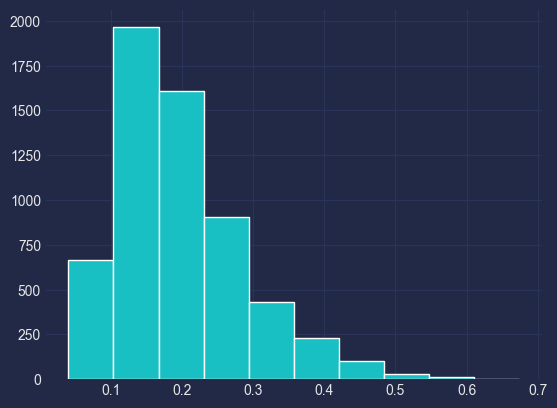

In [275]:
X_test.rf_gs_score.hist();

#### Пороги

По порогу 0.5 процент курящих людей ≈6% - что меньше, чем в обучающей выборке (≈20%)

In [279]:
((X_test.rf_gs_score > 0.5) * 1).mean()

0.006058566139347021

Создаю колонку для предсказания по порогу 0.5

In [280]:
X_test['rf_gs_pred'] = (X_test.rf_gs_score > 0.5) * 1

In [281]:
X_test.head()

,age,weight_kg_,waist_cm_,systolic,relaxation,fasting_blood_sugar,cholesterol,triglyceride,hdl,ldl,hemoglobin,urine_protein,serum_creatinine,ast,alt,gtp,dental_caries,tartar_Y,rf_gs_score,rf_gs_pred
0,40,75,87.0,140.0,90.0,131.0,225.0,216.0,52.0,129.0,16.4,1.0,1.1,25.0,58.0,43.0,0,True,0.209536,0
1,25,65,78.4,118.0,78.0,101.0,170.0,33.0,72.0,91.0,11.9,1.0,0.9,33.0,66.0,22.0,0,False,0.100822,0
2,50,105,109.3,130.0,90.0,96.0,162.0,144.0,71.0,62.0,15.4,1.0,0.9,19.0,24.0,32.0,0,True,0.183231,0
3,60,60,81.0,118.0,76.0,97.0,172.0,91.0,46.0,108.0,16.2,1.0,1.2,34.0,37.0,26.0,0,True,0.125941,0
4,45,70,83.0,130.0,80.0,100.0,191.0,365.0,34.0,84.0,15.2,1.0,0.7,27.0,25.0,26.0,0,False,0.231725,0


### Сохранение результатов

In [239]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = X_test.rf_gs_pred
submission.to_csv('RF_CV_LcC.csv', index=False)

In [240]:
submission.head()

,id,smoking
0,19200,0
1,7784,0
2,11682,0
3,9949,0
4,9378,0


### Модификация

#### Изменяю порог до 0.2

In [282]:
((X_test.rf_gs_score > 0.2) * 1).mean()

0.4060922248401212

#### Сохранение результатов

In [283]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (X_test.rf_gs_score > 0.2) * 1
submission.to_csv('RF_CV_LcC_THRSH_0.2.csv', index=False)

Проверка значений:

In [284]:
submission.smoking.mean()

0.4060922248401212

In [285]:
submission.head()

,id,smoking
0,19200,1
1,7784,0
2,11682,0
3,9949,0
4,9378,1


**Kaggle result:** F1 = 0.42968 ↑ - лучше, чем Baseline THRSH 0.2, но хуже чем CV THRSH 0.2

### Итого:
Наилучший порог для Random forest Grid Search ≈ 0.2, F1 = 0.42968. Лучше, чем Baseline Threshold = 0.2, F1 = 0.42861

## Best model
В данном разделе я покажу модель, с помощью которой, у меня получился лучший результат на Kaggle (6-ое место)
Данная модель использует: Баланс классов, Feature engineering (удаление некоторых фич из Дата сета), Построение модели с помощью GPU, изменение порога функции.
В данной модели не использовалась кросс-валидация, так как я не смог добиться с ней наилучшего результата.
В данной модели используется автоматический Learning rate, так как у меня не получилось подобрать LR лучше, даже с помощью Grid search

### Составляю список фич
Удалю ненужные фичи

In [ ]:
X = df.drop(['oral', 'smoking', 'hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)
y = df.smoking
cat_features = ['tartar']
df_test_copy = df_test_copy.drop(['hearing_left_', 'hearing_right_', 'id', 'eyesight_left_', 'eyesight_right_','urine_protein', 'height_cm_', 'systolic', 'cholesterol', ], axis=1)

In [ ]:
X.head()

In [ ]:
y.head()

In [ ]:
cat_features

### Обучающая и тестовая выборки
Заново разделю обучающую выборку на train и test, так как были удалены некоторые фичи.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=659)

### Создание Pool`ов для модели
Создаю Pool`ы для удобства обучения моделей

In [ ]:
train_data = Pool(X_train, y_train, cat_features=cat_features)
test_data = Pool(X_test, y_test, cat_features=cat_features)
full_data = Pool(X, y, cat_features=cat_features)

### Настройка гиперпараметров
В гиперпараметрах установлю: баланс классов, просчёт модели на GPU и Overfitting detector

In [ ]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'F1',
              'loss_function': 'Logloss',
              'random_seed': 659,
              'verbose': 100,
              'auto_class_weights': 'Balanced',
              'task_type': 'GPU',
              'iterations': 1000,
              'early_stopping_rounds': 300}

In [ ]:
model = CatBoostClassifier(**parameters)

### Обучение модели

In [ ]:
%%time
model.fit(train_data, eval_set=test_data, plot=True)

### Feature importance

Посмотрю важность фичей

In [ ]:
model.get_feature_importance(prettified=True)

Посмотрю основные, а так же все параметры модели

In [ ]:
model.get_params()

In [ ]:
model.get_all_params()

### Прогнозирование

#### Скоры

Создаю колонку для лучшего catboost скора

In [ ]:
df_test['best_cat_score'] = model.predict_proba(df_test_copy)[:, 1]

In [ ]:
df_test.best_cat_score.head()

Посмотрю распределение вероятностей (Score) курит или не курит

In [ ]:
df_test.best_cat_score.hist();

#### Пороги

По порогу 0.5 процент курящих людей ≈36.68% - что выше, чем в обучающей выборке (≈20%)

In [ ]:
((df_test.best_cat_score > 0.5) * 1).mean()

Такая же вероятность у метода predict, т.к. порог по умолчанию = 0.5

In [ ]:
model.predict(df_test_copy).mean()

Создаю колонку для предсказания по порогу 0.5

In [ ]:
df_test['best_cat_pred'] = (df_test.best_cat_score > 0.5) * 1

In [ ]:
df_test.head()

### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = df_test.best_cat_pred
submission.to_csv('Cat_ACW_GPU_drop9F.csv', index=False)

Проверка значений:

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** 0.43846 ↑↑↑

### Модификация

#### Изменение порога

Изменю порог с 0.5 на 0.4983

In [ ]:
((df_test.best_cat_score > 0.4983) * 1).mean()

#### Сохранение результатов

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['smoking'] = (df_test.best_cat_score > 0.4983) * 1
submission.to_csv('Cat_ACW_GPU_drop9F_THRSH0.4983.csv', index=False)

In [ ]:
submission.smoking.mean()

In [ ]:
submission.head()

**Kaggle result:** F1 = 0.43908

### Итого:
Наилучший порог = 0.4983, а F1 = 0.43908, что лучше, чем Baseline, а так же CV.

# 8. Visualisation


## Confusion matrix
Построю матрицу путаницы (ошибок)
Создам дополнительный Датасет и удалю из него лишение фичи, для корректного прогнозирования модели

In [ ]:
df_copy = df.copy()
df_copy = df_copy.drop(['id', 'height_cm_', 'eyesight_left_', 'eyesight_right_', 'hearing_left_', 'hearing_right_', 'systolic', 'cholesterol', 'urine_protein', 'smoking', 'oral'], axis=1)

Для построения создам колонку с предсказаниями на обучающей выборке

In [ ]:
df_copy['pred_smoking'] = model.predict(df_copy)
df_copy.pred_smoking.head()

Построю матрицу ошибок

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y, df_copy['pred_smoking'])).plot();

Посмотрю значения метрик

In [ ]:
print(classification_report(y, df_copy['pred_smoking']))

### Результаты:
Precision (точность) предсказаний = 0.37, то есть из 100 ПРЕДСКАЗАННЫХ курильщиков, только 37 являются НАСТОЯЩИМИ курильщиками.
Recall (полнота) предсказаний = 0.68, то есть из 100 РЕАЛЬНЫХ курильщиков модель верно распознаёт 68 курильщиков.
F1 мера - среднее гармоническое между точностью и полнотой = 0.47
Accuracy (процент правильных ответов) = 0.7, то есть модель правильно определяет, курит человек или нет в 70% случаев. Но в данном датасете присутствует дисбаланс классов, так как не курящих людей сильно больше, чем курящих, по этому данная метрика не совсем верно отображает суть.

## ROC AUC

Создам колонку с предсказаниями лучшей модели

In [ ]:
df_copy['predprob_smoking'] =  model.predict_proba(df_copy)[:, 1]

In [ ]:
df_copy.head()

Посмотрю значение метрики ROC AUC

In [ ]:
roc_auc_score(y, df_copy.predprob_smoking)

Построю график

In [ ]:
plt.figure(figsize=(12,5))
fpr, tpr, threshold = metrics.roc_curve(y, df_copy.predprob_smoking)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


### Результаты:
Метрика ROC AUC суммирует все матрицы путаницы и позволяет оценить модель в целом, не привязываясь к какому либо порогу. В данном случае ROC AUC = 0.76. Данная метрика не чувствительна к дисбалансу классов.

## Shap

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
np.float = float

In [ ]:
X.head()

Построю график всех фичей с использованием SHAP

In [ ]:
shap.summary_plot(shap_values, X)

Построю графики каждой фичи отдельно

In [ ]:
features = model.get_feature_importance(prettified=True)['Feature Id'].values

In [ ]:
features

In [ ]:
for feature in features:
    print(feature)

In [ ]:
for feature in features:
    shap.dependence_plot(feature, shap_values, X)

### Некоторые выводы из SHAP графиков:
Люди в возрасте 65 + менее склонны к курению
При значении gtp более 100, люди более склонны к курению
При значении alt более 50, люди менее склонны к курению
При значении триглицерида менее 100, люди менее склонны к куреню
При значении гемоглобина более 16, люди более склонны к курению
При значении ldl более 100, пациенты менее склонны к курению
При значении сахара в крови более 225, люди более склонны к курению
При наличии зубного камня, пациенты более склонны к курению

# 9. Results

## В ходе анализа было выполнено:

### 1. Изучено задание и загружен датасет
Обучающая выборка содержит 13863 переменных и 26 столбцов. Target - курит ли человек (smoking). Оценка прогноза производится по метрике F1.

### 2. Проведён первичный анализ данных
Данные проверены на пропуски и дубликаты. Пропуски и дубликаты отсутствуют. Колонки приведены к более удобному виду. Выведена краткая информация о датасете.

### 3. Проведён исследовательский анализ данных
С помощью библиотеки Phi_k выявлены взаимосвязи. Изучена корреляция признаков. Построены графики распределения и зависимости количественных и категориальных признаков.

### 4. Проведена предобработка данных
Из датасета были удалены выбросы. Был сформирован список фичей для машинного обучения.

### 5. Проведено моделирование
Построено множество моделей с использованием градиентного бустинга Catboost. Наилучшие параметры подбирались с помощью Grid search, а так же эмпирическим путём. Лучшая модель по показателю F1 = 0.43908

### 6. Произведён анализ результатов
Были построены: Матрица путаницы, график метрики ROC AUC, а так же несколько графиков, с помощью библиотеки SHAP для анализа влияния различных фичей на таргет.

# 10. Conclusions

1. Задача прогнозирования и поиска курящих пациентов была выполнена.
2. Наилучший результат на kaggle по метрике F1 = 0.43908 (top 6)
3. С данным датасетом модель катбуста справилась лучше чем Random forest
4. Одним из главных гиперпараметров модели для наилучшего результата стали сбалансированные веса классов (auto_class_weights: Balanced). Без данного гиперпараметра при пороге по умолчанию 0.5 модель показывает не лучшие результаты.
5. В дальнейшем для улучшения модели можно попробовать прогнать больше различных вариантов гиперпараметров с помощью Grid search CV и попробовать увеличить количество итераций, а так же уменьшить Learninig rate.